# Importing

In [ ]:
import pandas as pd

In [ ]:
df_event_log = pd.read_csv('merged_output_with_agreement.csv')

df_event_log

Transcript number District nurse present Patient present  \
0                     1                   DN01             P01   
1                     1                   DN01             P01   
2                     1                   DN01             P01   
3                     1                   DN01             P01   
4                     1                   DN01             P01   
...                 ...                    ...             ...   
3856                 27                   DN03             P27   
3857                 27                   DN03             P27   
3858                 27                   DN03             P27   
3859                 27                   DN03             P27   
3860                 27                   DN03             P27   

                Timestamp                                               Text  \
0     2023-09-12 08:48:00  Verpleegkundige: Ja nou, daar gaan we weer. Ik...   
1     2023-09-12 08:48:10  Verpleegkundige: Nou ga ik alvast naar boven. ...   
2     2023-09-12 08:48:11  Verpleegkundige: Nee hoor, hij blijft gewoon b...   
3     2023-09-12 08:48:15  Verpleegkundige: Ja, wij doen gewoon ons ding ...   
4     2023-09-12 08:48:24                      Patient: Was het druk buiten?   
...                   ...                                                ...   
3856  2023-12-05 09:05:07  Verpleegkundige: Ja, daarom. Nou leeg potje hi...   
3857  2023-12-05 09:05:08  Verpleegkundige: Ja, dat heb ik al gedaan. Ik ...   
3858  2023-12-05 09:05:13  Verpleegkundige: Dat is goed, zal ik doen.; Pa...   
3859  2023-12-05 09:05:25                               Verpleegkundige: Ja.   
3860  2023-12-05 09:05:44  Verpleegkundige: Zo, weer licht. ; Patient: Ja...   

                                        Intervention_R1  \
0                   Voorlichting: procedure/behandeling   
1                                         Aanwezig zijn   
2                                      Actief luisteren   
3                                      Actief luisteren   
4                                      Actief luisteren   
...                                                 ...   
3856                                   Actief luisteren   
3857  Persoonlijke verzorging, ondersteuning toiletgang   
3858                                   Actief luisteren   
3859                                   Actief luisteren   
3860                                   Actief luisteren   

                               ENG_R1                   Class_R1  \
0       Teaching: Procedure/Treatment           Health education   
1                            Presence          Coping assistance   
2                    Active Listening  Communication enhancement   
3                    Active Listening  Communication enhancement   
4                    Active Listening  Communication enhancement   
...                               ...                        ...   
3856                 Active Listening  Communication enhancement   
3857  Self-Care Assistance: Toileting     Elimination management   
3858                 Active Listening  Communication enhancement   
3859                 Active Listening  Communication enhancement   
3860                 Active Listening  Communication enhancement   

                 Domain_R1                                    Intervention_R2  \
0               Behavioral                Voorlichting: procedure/behandeling   
1               Behavioral                                      Aanwezig zijn   
2               Behavioral                                   Actief luisteren   
3               Behavioral                                   Actief luisteren   
4               Behavioral                                   Actief luisteren   
...                    ...                                                ...   
3856            Behavioral  Persoonlijke verzorging, ondersteuning toiletgang   
3857  Physiological: basic  Persoonlijke verzorging, ondersteuning toiletgang 

# Messed up the timestamps before classification :-(. Fixed that here.

In [ ]:
# Load the original data with correct timestamps
df_original_timestamps = pd.read_csv('transcript_before_merge.csv')

# Create the 'Text' column based on 'Speaker' and 'Quote'
def create_text(row):
    if row['Speaker'].startswith('DN'):
        return f"Verpleegkundige: {row['Quote']}"
    elif row['Speaker'].startswith('P'):
        return f"Patient: {row['Quote']}"
    return row['Quote']

df_original_timestamps['Text'] = df_original_timestamps.apply(create_text, axis=1)

df_original_timestamps

Transcript number District nurse present Patient present  \
0                     9                   DN01             P09   
1                     9                   DN01             P09   
2                     9                   DN01             P09   
3                     9                   DN01             P09   
4                     9                   DN01             P09   
...                 ...                    ...             ...   
6552                 27                   DN03             P27   
6553                 27                   DN03             P27   
6554                 27                   DN03             P27   
6555                 27                   DN03             P27   
6556                 27                   DN03             P27   

                Timestamp Speaker  \
0     2023-10-24 08:23:00    DN01   
1     2023-10-24 08:23:05     P09   
2     2023-10-24 08:23:06    DN01   
3     2023-10-24 08:23:17     P09   
4     2023-10-24 08:23:46    DN01   
...                   ...     ...   
6552  2023-12-08 09:03:00    DN03   
6553  2023-12-08 09:03:04     P27   
6554  2023-12-08 09:04:07    DN03   
6555  2023-12-08 09:04:08     P27   
6556  2023-12-08 09:03:14    DN03   

                                                  Quote  \
0     En dan vraag ik nog een keertje aan jou, vind ...   
1                                                   Ja.   
2     Oké, dan laat ik dit gewoon hier liggen. En da...   
3     Heb ik een rara droom gehad, maar. Ja, Ik heb ...   
4                        Maar werd je zo laat geholpen?   
...                                                 ...   
6552                          Dat is goed, zal ik doen.   
6553                                      Ja oké, dan.    
6554                                   Zo, weer licht.    
6555  Jazeker. Het is nu een stuk lichter, en ’s avo...   
6556                                                Ja.   

                                                   Text  
0     Verpleegkundige: En dan vraag ik nog een keert...  
1                                          Patient: Ja.  
2     Verpleegkundige: Oké, dan laat ik dit gewoon h...  
3     Patient: Heb ik een rara droom gehad, maar. Ja...  
4       Verpleegkundige: Maar werd je zo laat geholpen?  
...                                                 ...  
6552         Verpleegkundige: Dat is goed, zal ik doen.  
6553                             Patient: Ja oké, dan.   
6554                  Verpleegkundige: Zo, weer licht.   
6555  Patient: Jazeker. Het is nu een stuk lichter, ...  
6556                               Verpleegkundige: Ja.  

[6557 rows x 7 columns]

In [ ]:
# Assuming df_event_log is already loaded in your environment
# Add a new column for accurate timestamps
df_event_log['Accurate timestamp'] = None

# Iterate through each row in df_event_log
for index, row in df_event_log.iterrows():
    transcript_number = row['Transcript number']
    event_text = row['Text']

    # Find the matching row in df_original_timestamps based on substring matching
    matching_rows = df_original_timestamps[
        (df_original_timestamps['Transcript number'] == transcript_number) &
        (df_original_timestamps['Text'].apply(lambda x: x in event_text))
    ]

    # If a matching row is found, update the 'Accurate timestamp'
    if not matching_rows.empty:
        df_event_log.at[index, 'Accurate timestamp'] = matching_rows.iloc[0]['Timestamp']

# Optionally, save it to a CSV file
df_event_log.to_csv('merged_output_with_agreement_improved_timestamps.csv', index=False)

# Display the updated df_event_log
df_event_log

Transcript number District nurse present Patient present  \
0                     1                   DN01             P01   
1                     1                   DN01             P01   
2                     1                   DN01             P01   
3                     1                   DN01             P01   
4                     1                   DN01             P01   
...                 ...                    ...             ...   
3856                 27                   DN03             P27   
3857                 27                   DN03             P27   
3858                 27                   DN03             P27   
3859                 27                   DN03             P27   
3860                 27                   DN03             P27   

                Timestamp                                               Text  \
0     2023-09-12 08:48:00  Verpleegkundige: Ja nou, daar gaan we weer. Ik...   
1     2023-09-12 08:48:10  Verpleegkundige: Nou ga ik alvast naar boven. ...   
2     2023-09-12 08:48:11  Verpleegkundige: Nee hoor, hij blijft gewoon b...   
3     2023-09-12 08:48:15  Verpleegkundige: Ja, wij doen gewoon ons ding ...   
4     2023-09-12 08:48:24                      Patient: Was het druk buiten?   
...                   ...                                                ...   
3856  2023-12-05 09:05:07  Verpleegkundige: Ja, daarom. Nou leeg potje hi...   
3857  2023-12-05 09:05:08  Verpleegkundige: Ja, dat heb ik al gedaan. Ik ...   
3858  2023-12-05 09:05:13  Verpleegkundige: Dat is goed, zal ik doen.; Pa...   
3859  2023-12-05 09:05:25                               Verpleegkundige: Ja.   
3860  2023-12-05 09:05:44  Verpleegkundige: Zo, weer licht. ; Patient: Ja...   

                                        Intervention_R1  \
0                   Voorlichting: procedure/behandeling   
1                                         Aanwezig zijn   
2                                      Actief luisteren   
3                                      Actief luisteren   
4                                      Actief luisteren   
...                                                 ...   
3856                                   Actief luisteren   
3857  Persoonlijke verzorging, ondersteuning toiletgang   
3858                                   Actief luisteren   
3859                                   Actief luisteren   
3860                                   Actief luisteren   

                               ENG_R1                   Class_R1  \
0       Teaching: Procedure/Treatment           Health education   
1                            Presence          Coping assistance   
2                    Active Listening  Communication enhancement   
3                    Active Listening  Communication enhancement   
4                    Active Listening  Communication enhancement   
...                               ...                        ...   
3856                 Active Listening  Communication enhancement   
3857  Self-Care Assistance: Toileting     Elimination management   
3858                 Active Listening  Communication enhancement   
3859                 Active Listening  Communication enhancement   
3860                 Active Listening  Communication enhancement   

                 Domain_R1                                    Intervention_R2  \
0               Behavioral                Voorlichting: procedure/behandeling   
1               Behavioral                                      Aanwezig zijn   
2               Behavioral                                   Actief luisteren   
3               Behavioral                                   Actief luisteren   
4               Behavioral                                   Actief luisteren   
...                    ...                                                ...   
3856            Behavioral  Persoonlijke verzorging, ondersteuning toiletgang   
3857  Physiological: basic  Persoonlijke verzorging, ondersteuning toiletgang 

In [ ]:
# Convert 'Accurate timestamp' to datetime
df_event_log['Accurate timestamp'] = pd.to_datetime(df_event_log['Accurate timestamp'])

# Group by 'Transcript number' and calculate the time difference
df_event_log['time_from_start'] = df_event_log.groupby('Transcript number')['Accurate timestamp']\
                                             .transform(lambda x: (x - x.min()).dt.total_seconds())

df_event_log

Transcript number District nurse present Patient present  \
0                     1                   DN01             P01   
1                     1                   DN01             P01   
2                     1                   DN01             P01   
3                     1                   DN01             P01   
4                     1                   DN01             P01   
...                 ...                    ...             ...   
3856                 27                   DN03             P27   
3857                 27                   DN03             P27   
3858                 27                   DN03             P27   
3859                 27                   DN03             P27   
3860                 27                   DN03             P27   

                Timestamp                                               Text  \
0     2023-09-12 08:48:00  Verpleegkundige: Ja nou, daar gaan we weer. Ik...   
1     2023-09-12 08:48:10  Verpleegkundige: Nou ga ik alvast naar boven. ...   
2     2023-09-12 08:48:11  Verpleegkundige: Nee hoor, hij blijft gewoon b...   
3     2023-09-12 08:48:15  Verpleegkundige: Ja, wij doen gewoon ons ding ...   
4     2023-09-12 08:48:24                      Patient: Was het druk buiten?   
...                   ...                                                ...   
3856  2023-12-05 09:05:07  Verpleegkundige: Ja, daarom. Nou leeg potje hi...   
3857  2023-12-05 09:05:08  Verpleegkundige: Ja, dat heb ik al gedaan. Ik ...   
3858  2023-12-05 09:05:13  Verpleegkundige: Dat is goed, zal ik doen.; Pa...   
3859  2023-12-05 09:05:25                               Verpleegkundige: Ja.   
3860  2023-12-05 09:05:44  Verpleegkundige: Zo, weer licht. ; Patient: Ja...   

                                        Intervention_R1  \
0                   Voorlichting: procedure/behandeling   
1                                         Aanwezig zijn   
2                                      Actief luisteren   
3                                      Actief luisteren   
4                                      Actief luisteren   
...                                                 ...   
3856                                   Actief luisteren   
3857  Persoonlijke verzorging, ondersteuning toiletgang   
3858                                   Actief luisteren   
3859                                   Actief luisteren   
3860                                   Actief luisteren   

                               ENG_R1                   Class_R1  \
0       Teaching: Procedure/Treatment           Health education   
1                            Presence          Coping assistance   
2                    Active Listening  Communication enhancement   
3                    Active Listening  Communication enhancement   
4                    Active Listening  Communication enhancement   
...                               ...                        ...   
3856                 Active Listening  Communication enhancement   
3857  Self-Care Assistance: Toileting     Elimination management   
3858                 Active Listening  Communication enhancement   
3859                 Active Listening  Communication enhancement   
3860                 Active Listening  Communication enhancement   

                 Domain_R1                                    Intervention_R2  \
0               Behavioral                Voorlichting: procedure/behandeling   
1               Behavioral                                      Aanwezig zijn   
2               Behavioral                                   Actief luisteren   
3               Behavioral                                   Actief luisteren   
4               Behavioral                                   Actief luisteren   
...                    ...                                                ...   
3856            Behavioral  Persoonlijke verzorging, ondersteuning toiletgang   
3857  Physiological: basic  Persoonlijke verzorging, ondersteuning toiletgang 

# Visualize descriptives

In [ ]:
# Use .loc to avoid SettingWithCopyWarning
df_event_log.loc[:, 'Accurate timestamp'] = pd.to_datetime(df_event_log['Accurate timestamp'])

# Group by 'Transcript number' and aggregate the data to get the first and last timestamps
overview = df_event_log.groupby('Transcript number').agg({
    'Accurate timestamp': ['min', 'max']
}).reset_index()

# Flatten the MultiIndex columns
overview.columns = ['Transcript number', 'First Timestamp', 'Last Timestamp']

# Calculate the duration for each 'Transcript number'
overview['Duration'] = overview['Last Timestamp'] - overview['First Timestamp']

overview

Transcript number     First Timestamp      Last Timestamp        Duration
0                   1 2023-09-12 08:48:00 2023-09-12 09:22:47 0 days 00:34:47
1                   2 2023-09-12 09:35:00 2023-09-12 09:43:10 0 days 00:08:10
2                   3 2023-09-12 09:55:00 2023-09-12 10:07:27 0 days 00:12:27
3                   4 2023-09-12 10:34:00 2023-09-12 10:55:48 0 days 00:21:48
4                   5 2023-10-13 08:41:00 2023-10-13 09:32:57 0 days 00:51:57
5                   6 2023-10-13 09:35:00 2023-10-13 10:10:46 0 days 00:35:46
6                   7 2023-10-13 10:15:02 2023-10-13 10:58:08 0 days 00:43:06
7                   8 2023-10-13 11:27:00 2023-10-13 12:15:18 0 days 00:48:18
8                   9 2023-10-24 08:23:00 2023-10-24 08:51:19 0 days 00:28:19
9                  10 2023-10-24 09:03:00 2023-10-24 09:35:32 0 days 00:32:32
10                 11 2023-10-24 09:44:00 2023-10-24 09:54:21 0 days 00:10:21
11                 12 2023-10-24 10:05:00 2023-10-24 10:23:57 0 days 00:18:57
12                 13 2023-10-24 10:40:00 2023-10-24 10:55:02 0 days 00:15:02
13                 14 2023-10-24 21:46:00 2023-10-24 22:00:27 0 days 00:14:27
14                 15 2023-11-04 08:49:00 2023-11-04 09:06:02 0 days 00:17:02
15                 16 2023-11-04 10:11:15 2023-11-04 10:37:50 0 days 00:26:35
16                 17 2023-11-04 10:47:00 2023-11-04 11:23:44 0 days 00:36:44
17                 18 2023-11-04 11:35:00 2023-11-04 12:06:18 0 days 00:31:18
18                 19 2023-11-04 12:17:21 2023-11-04 12:29:44 0 days 00:12:23
19                 20 2023-11-05 08:33:58 2023-11-05 09:15:23 0 days 00:41:25
20                 21 2023-11-05 09:19:11 2023-11-05 09:33:16 0 days 00:14:05
21                 22 2023-11-05 09:44:03 2023-11-05 10:06:33 0 days 00:22:30
22                 23 2023-11-05 10:39:25 2023-11-05 11:20:49 0 days 00:41:24
23                 24 2023-12-04 08:28:00 2023-12-04 09:10:03 0 days 00:42:03
24                 25 2023-12-05 08:33:00 2023-12-05 09:38:47 0 days 01:05:47
25                 26 2023-12-07 08:05:00 2023-12-07 09:03:33 0 days 00:58:33
26                 27 2023-12-08 08:30:15 2023-12-08 09:03:00 0 days 00:32:45

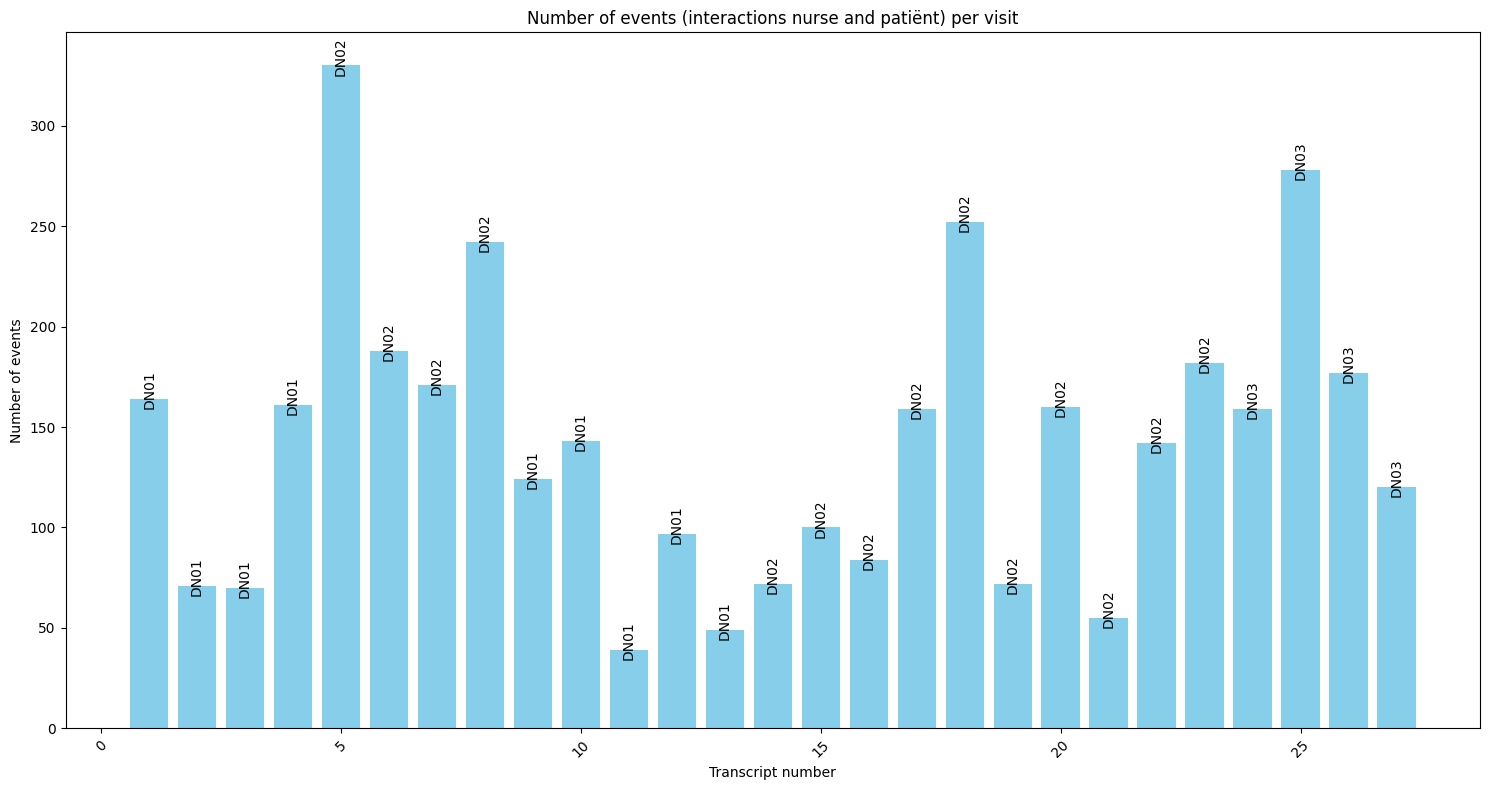

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use .loc to avoid SettingWithCopyWarning
df_event_log.loc[:, 'Accurate timestamp'] = pd.to_datetime(df_event_log['Accurate timestamp'])

# Group by 'Transcript number' and aggregate the data
grouped = df_event_log.groupby('Transcript number').agg({
    'Accurate timestamp': ['min', 'max', 'count'],
    'District nurse present': 'first'
}).reset_index()

# Flatten the MultiIndex columns
grouped.columns = ['Transcript number', 'Start Time', 'End Time', 'Event Count', 'District Nurse']

# Calculate the total time spent per patient visit
grouped['Total Time Spent'] = grouped['End Time'] - grouped['Start Time']

plt.figure(figsize=(15, 8))
bars = plt.bar(grouped['Transcript number'], grouped['Event Count'], color='skyblue')
plt.xlabel('Transcript number')
plt.ylabel('Number of events')
plt.title('Number of events (interactions nurse and patiënt) per visit')
plt.xticks(rotation=45)

# Annotate with the nurse's name
for bar, nurse in zip(bars, grouped['District Nurse']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, nurse, ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

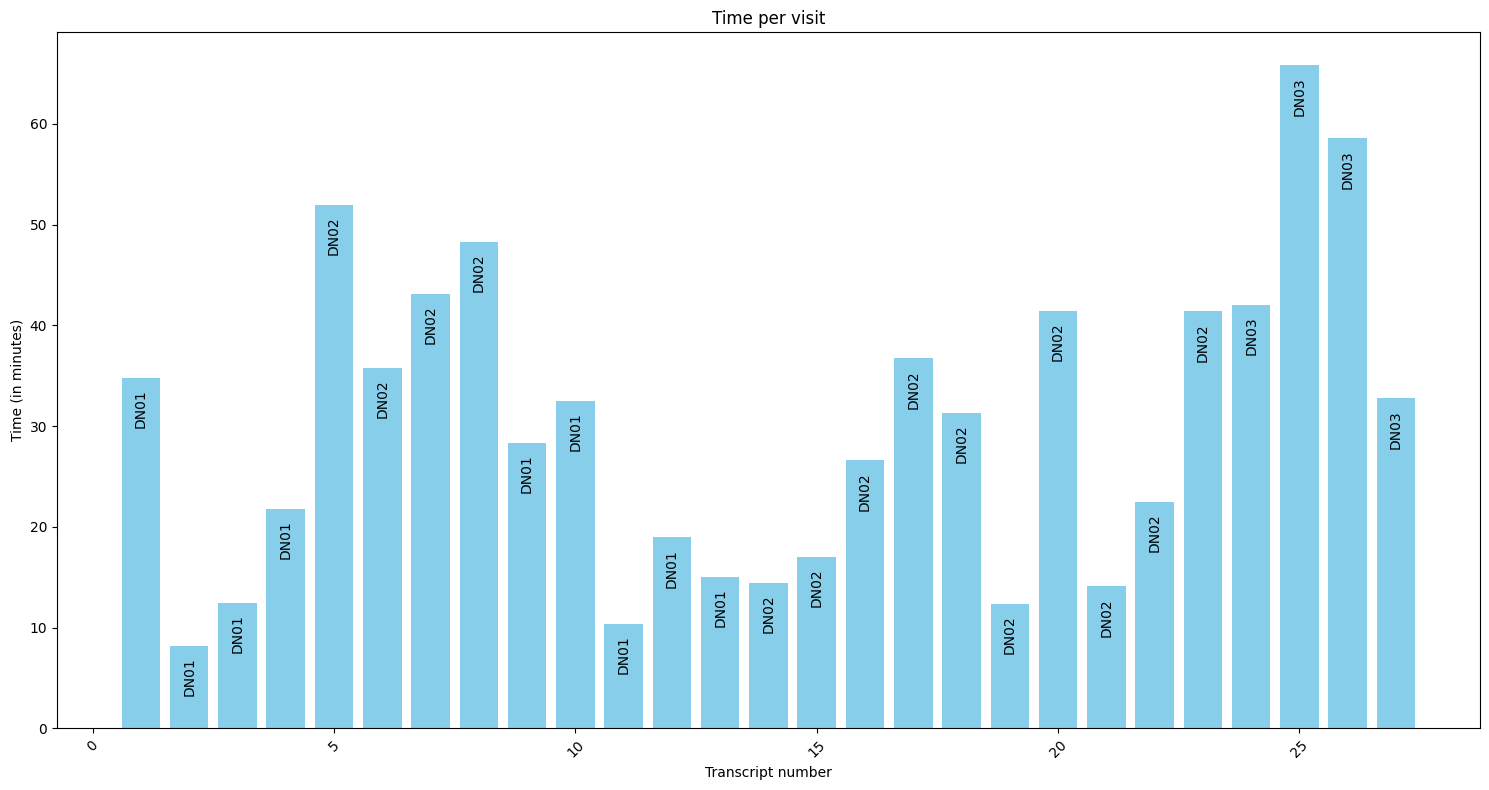

In [ ]:
# Ensure 'Total Time Spent' is a timedelta type
grouped['Total Time Spent'] = pd.to_timedelta(grouped['Total Time Spent'])

# Convert 'Total Time Spent' to minutes
grouped['Total Time Spent (Minutes)'] = grouped['Total Time Spent'].dt.total_seconds() / 60

# Plotting the bar chart
plt.figure(figsize=(15, 8))

bars = plt.bar(grouped['Transcript number'], grouped['Total Time Spent'].dt.total_seconds() / 60, color='skyblue')
plt.xlabel('Transcript number')
plt.ylabel('Time (in minutes)')
plt.title('Time per visit')
plt.xticks(rotation=45)

# Annotate with the nurse's name
for bar, nurse in zip(bars, grouped['District Nurse']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, nurse, ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

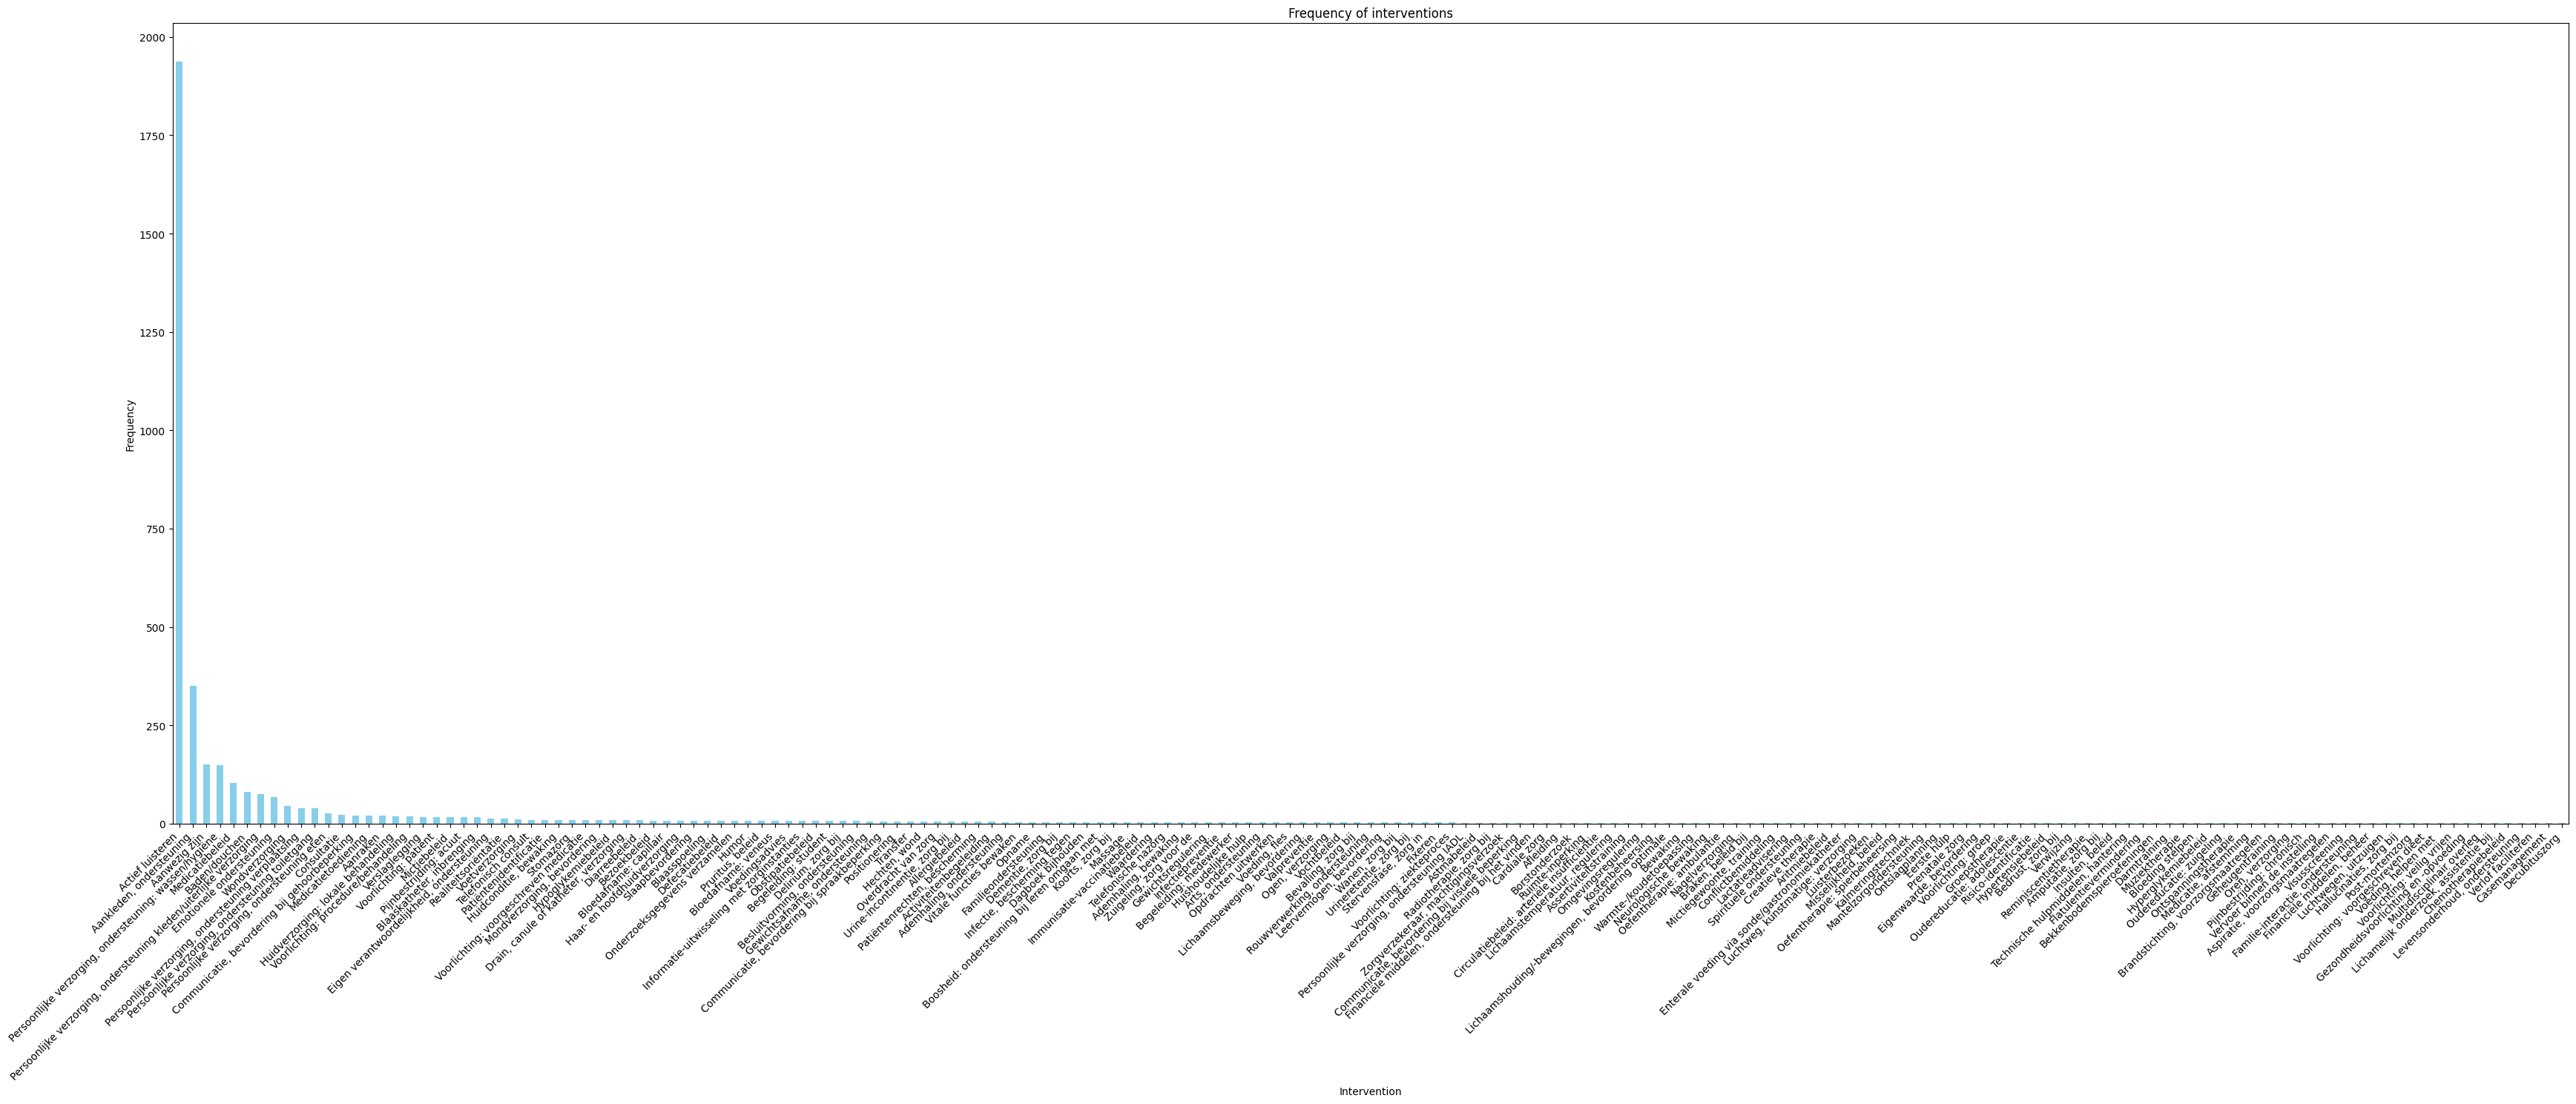

In [ ]:
# Count the occurrences of each value in 'Intervention_final'
value_counts = df_event_log['Intervention_final'].value_counts()

# Plot the bar chart with a wider figure
plt.figure(figsize=(35, 15))  # Adjust the width to be wider

value_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Frequency of interventions')
plt.xlabel('Intervention')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

In [ ]:
# Count the occurrences of each value in 'Intervention_final' and convert it to a DataFrame
value_counts = df_event_log['Intervention_final'].value_counts().reset_index()

# Rename columns for better readability
value_counts.columns = ['Intervention', 'Frequency']

value_counts

Intervention  Frequency
0                                     Actief luisteren       1938
1                             Aankleden, ondersteuning        351
2                                        Aanwezig zijn        150
3    Persoonlijke verzorging, ondersteuning: wassen...        149
4                                      Medicatiebeleid        104
..                                                 ...        ...
172                                Chemotherapiebeleid          1
173                     Levensonderhoud, ondersteuning          1
174                                 Verlof faciliteren          1
175                                     Casemanagement          1
176                                      Decubituszorg          1

[177 rows x 2 columns]

LET OP: Vanaf hier halen we Actief luisteren en Aanwezig zijn eruit.

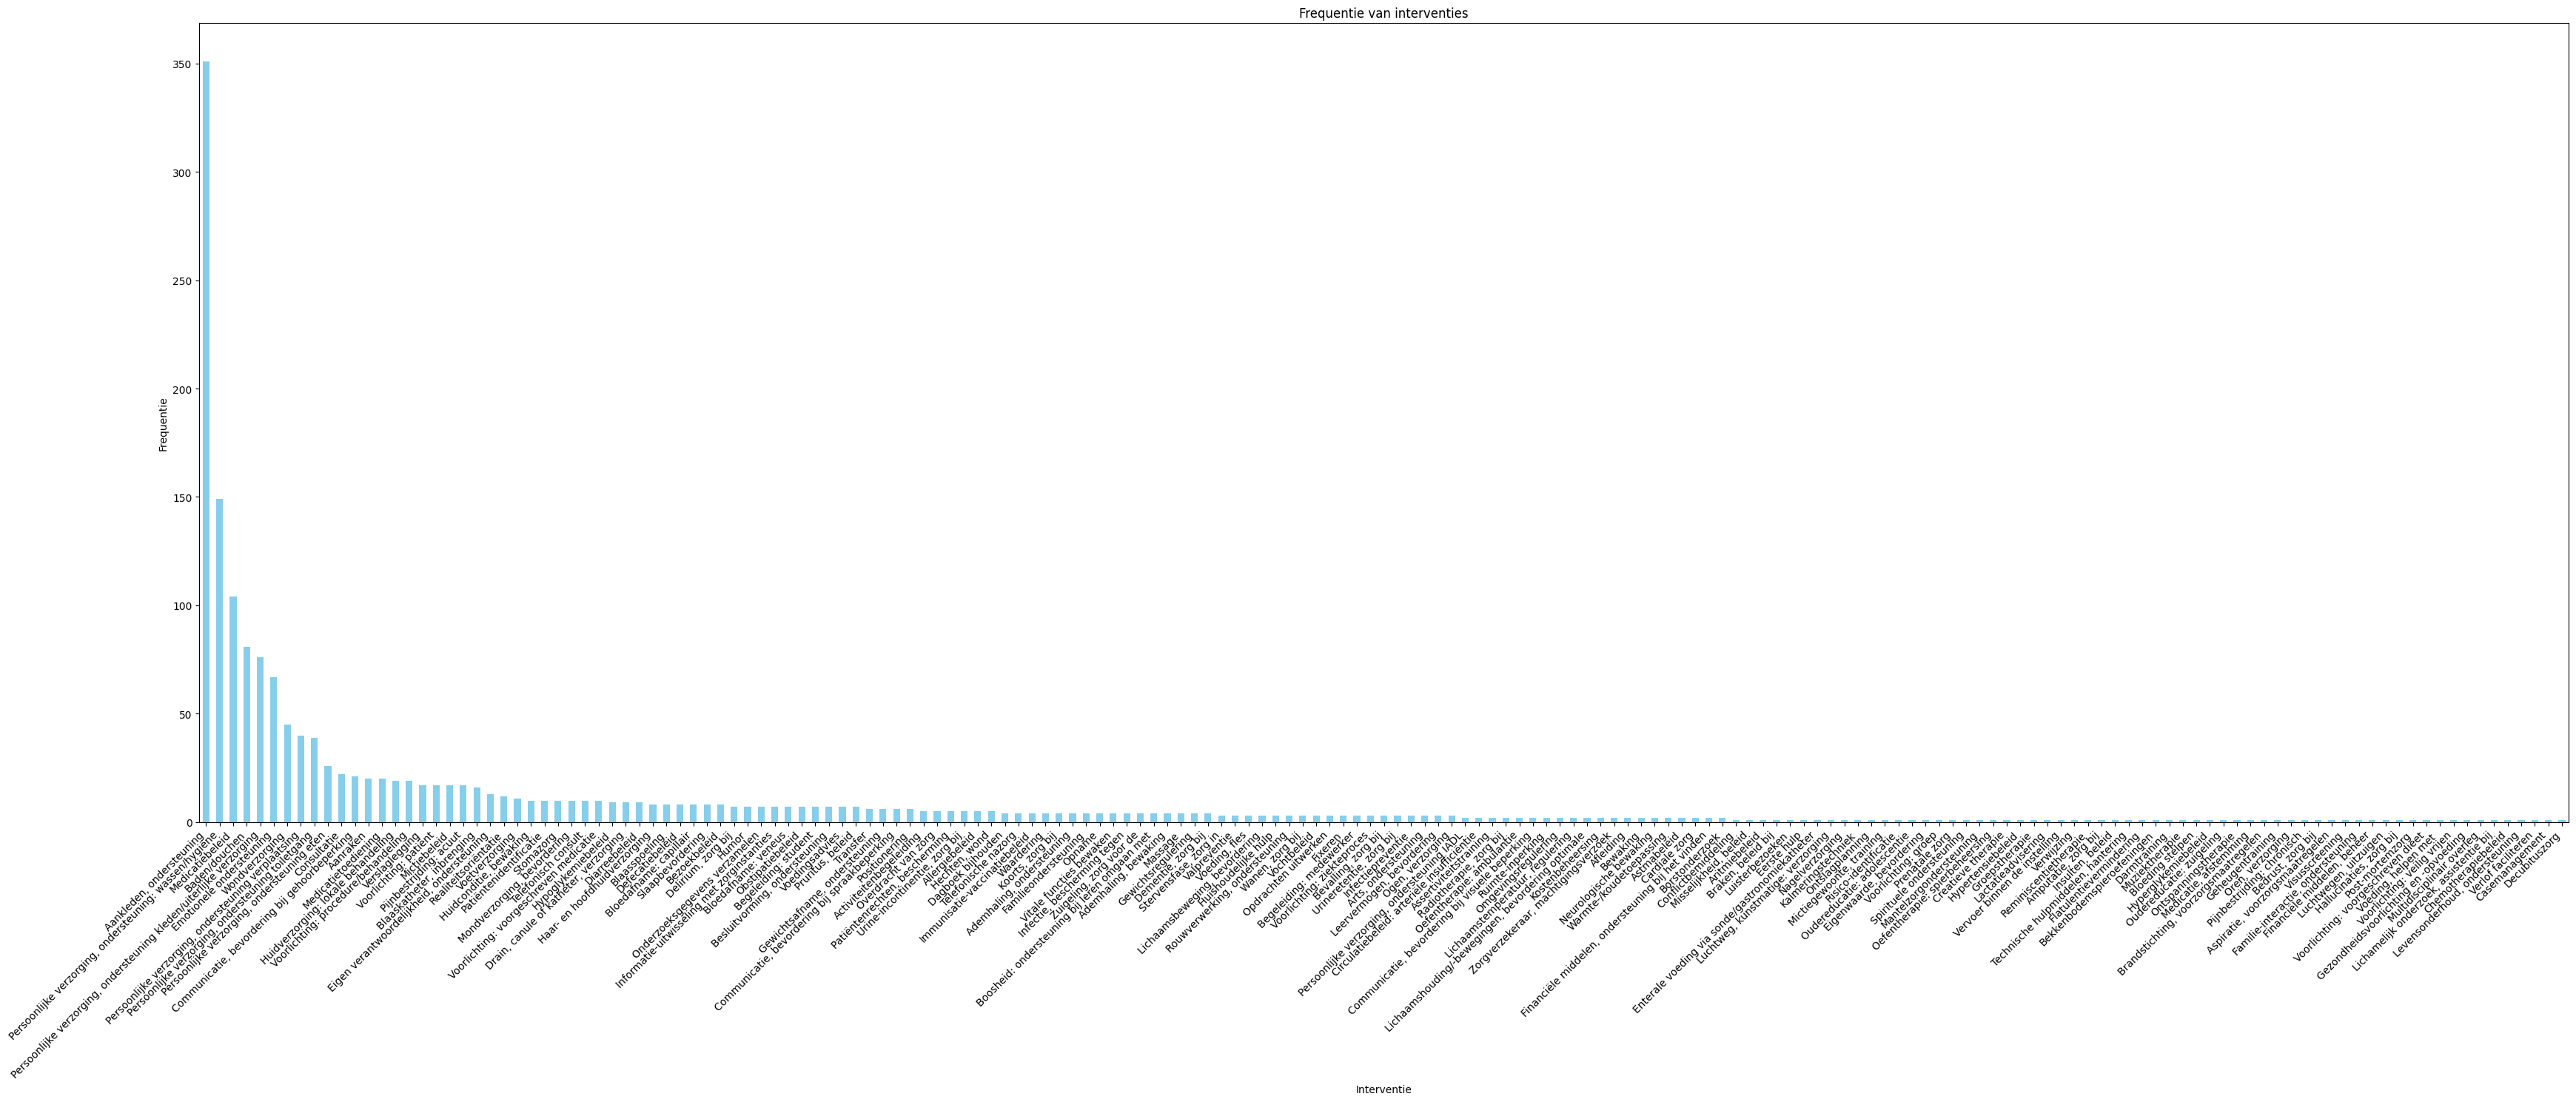

In [ ]:
# Drop rows with 'Actief luisteren' and 'Aanwezig zijn' in 'Intervention_final'
df_event_log = df_event_log[~df_event_log['Intervention_final'].isin(['Actief luisteren', 'Aanwezig zijn'])]

# Count the occurrences of each value in 'Intervention_final'
value_counts = df_event_log['Intervention_final'].value_counts()

# Plot the bar chart with a wider figure
plt.figure(figsize=(35, 15))  # Adjust the width to be wider

value_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Frequentie van interventies')
plt.xlabel('Interventie')
plt.ylabel('Frequentie')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

In [ ]:
df_event_log

Transcript number District nurse present Patient present  \
0                     1                   DN01             P01   
5                     1                   DN01             P01   
13                    1                   DN01             P01   
15                    1                   DN01             P01   
21                    1                   DN01             P01   
...                 ...                    ...             ...   
3850                 27                   DN03             P27   
3852                 27                   DN03             P27   
3855                 27                   DN03             P27   
3856                 27                   DN03             P27   
3857                 27                   DN03             P27   

                Timestamp                                               Text  \
0     2023-09-12 08:48:00  Verpleegkundige: Ja nou, daar gaan we weer. Ik...   
5     2023-09-12 08:48:26  Verpleegkundige: Wat zegt u?; Patient: Wat het...   
13    2023-09-12 08:49:12  Verpleegkundige: Wie is dit?; Patient: Dat is ...   
15    2023-09-12 08:49:20  Verpleegkundige: Ja, hij hangt weer ja, maar h...   
21    2023-09-12 08:49:35  Verpleegkundige: Moeten we de haren wassen van...   
...                   ...                                                ...   
3850  2023-12-05 09:04:44  Verpleegkundige: Ja, haal ik er weer helemaal ...   
3852  2023-12-05 09:04:57  Verpleegkundige: Ja, want die moet eruit voor ...   
3855  2023-12-05 09:05:05  Verpleegkundige: Kijken of het lukt en als het...   
3856  2023-12-05 09:05:07  Verpleegkundige: Ja, daarom. Nou leeg potje hi...   
3857  2023-12-05 09:05:08  Verpleegkundige: Ja, dat heb ik al gedaan. Ik ...   

                                        Intervention_R1  \
0                   Voorlichting: procedure/behandeling   
5                                  Realiteitsoriëntatie   
13                                 Realiteitsoriëntatie   
15                                     Actief luisteren   
21    Persoonlijke verzorging, ondersteuning: wassen...   
...                                                 ...   
3850  Persoonlijke verzorging, ondersteuning kleden/...   
3852                                    Medicatiebeleid   
3855                                    Medicatiebeleid   
3856                                   Actief luisteren   
3857  Persoonlijke verzorging, ondersteuning toiletgang   

                                       ENG_R1                   Class_R1  \
0               Teaching: Procedure/Treatment           Health education   
5                         Reality Orientation          Cognitive therapy   
13                        Reality Orientation          Cognitive therapy   
15                           Active Listening  Communication enhancement   
21      Self-Care Assistance: Bathing/Hygiene     Self-care facilitation   
...                                       ...                        ...   
3850  Self-Care Assistance: Dressing/Grooming     Self-care facilitation   
3852                    Medication Management      Medication Management   
3855                    Medication Management      Medication Management   
3856                         Active Listening  Communication enhancement   
3857          Self-Care Assistance: Toileting     Elimination management   

                   Domain_R1  \
0                 Behavioral   
5                 Behavioral   
13                Behavioral   
15                Behavioral   
21      Physiological: basic   
...                      ...   
3850    Physiological: basic   
3852  Physiological: complex   
3855  Physiological: complex   
3856              Behavioral   
3857    Physiological: basic   

                                        Intervention_R2  ...  \
0                   Voorlichting: procedure/behandeling  ...   
5                                  Realiteitsoriëntatie  ...   
13                                 Realiteitsoriëntat

In [ ]:
# Assuming df_event_log is your existing DataFrame
# Step 1: Group by 'Transcript number' and 'Intervention_final' and count occurrences
unique_counts_df = df_event_log.groupby(['Transcript number', 'Intervention_final']).size().reset_index(name='Count')

# Step 2: Pivot the table to get the desired format
result_df = unique_counts_df.pivot(index='Transcript number', columns='Intervention_final', values='Count')

# Step 3: Fill NaN values with 0, as missing combinations mean 0 occurrences
result_df = result_df.fillna(0).astype(int)

# If you want to reset the column names
result_df = result_df.reset_index()

# Display the resulting DataFrame
result_df

Intervention_final  Transcript number  Aankleden, ondersteuning  Aanraken  \
0                                   1                        16         0   
1                                   2                         3         0   
2                                   3                         2         2   
3                                   4                        15         1   
4                                   5                        36         2   
5                                   6                        11         0   
6                                   7                        18         2   
7                                   8                         5         1   
8                                   9                        27         0   
9                                  10                        17         0   
10                                 11                         3         0   
11                                 12                         5         0   
12                                 13                         0         0   
13                                 14                         6         0   
14                                 15                         6         0   
15                                 16                         5         1   
16                                 17                        13         2   
17                                 18                        23         0   
18                                 19                         3         0   
19                                 20                        21         1   
20                                 21                         2         0   
21                                 22                        17         0   
22                                 23                         5         1   
23                                 24                        23         1   
24                                 25                        31         2   
25                                 26                        22         0   
26                                 27                        16         4   

Intervention_final  Activiteitenbegeleiding  Ademhaling, bewaking  \
0                                         0                     0   
1                                         0                     0   
2                                         0                     0   
3                                         1                     2   
4                                         0                     0   
5                                         0                     1   
6                                         0                     0   
7                                         0                     0   
8                                         0                     0   
9                                         0                     0   
10                                        0                     0   
11                                        1                     0   
12                                        0                     0   
13                                        0                     1   
14                                        0                     0   
15                                        0                     0   
16                                        0                     0   
17                                        1                     0   
18                                        1                     0   
19                                        0                     0   
20                                        1                     0   
21                                        0                     0   
22                                        0                     0   
23                                        0                     0   
24                                        0                     0   
25                                        0      

In [ ]:
# Step 1: Count the number of unique interventions per 'Transcript number'
unique_activities_count = df_event_log.groupby('Transcript number')['Intervention_final'].nunique().reset_index(name='Unique Activities Count')

# Step 2: Merge this count with the previous result_df
result_df = result_df.merge(unique_activities_count, on='Transcript number')

# Display the updated DataFrame
result_df


Transcript number  Aankleden, ondersteuning  Aanraken  \
0                   1                        16         0   
1                   2                         3         0   
2                   3                         2         2   
3                   4                        15         1   
4                   5                        36         2   
5                   6                        11         0   
6                   7                        18         2   
7                   8                         5         1   
8                   9                        27         0   
9                  10                        17         0   
10                 11                         3         0   
11                 12                         5         0   
12                 13                         0         0   
13                 14                         6         0   
14                 15                         6         0   
15                 16                         5         1   
16                 17                        13         2   
17                 18                        23         0   
18                 19                         3         0   
19                 20                        21         1   
20                 21                         2         0   
21                 22                        17         0   
22                 23                         5         1   
23                 24                        23         1   
24                 25                        31         2   
25                 26                        22         0   
26                 27                        16         4   

    Activiteitenbegeleiding  Ademhaling, bewaking  Ademhaling, ondersteuning  \
0                         0                     0                          0   
1                         0                     0                          0   
2                         0                     0                          0   
3                         1                     2                          0   
4                         0                     0                          0   
5                         0                     1                          1   
6                         0                     0                          0   
7                         0                     0                          0   
8                         0                     0                          2   
9                         0                     0                          0   
10                        0                     0                          0   
11                        1                     0                          0   
12                        0                     0                          0   
13                        0                     1                          1   
14                        0                     0                          0   
15                        0                     0                          0   
16                        0                     0                          0   
17                        1                     0                          0   
18                        1                     0                          0   
19                        0                     0                          0   
20                        1                     0                          0   
21                        0                     0                          0   
22                        0                     0                          0   
23                        0                     0                          0   
24                        0                     0                          0   
25                        0                     0                          0   
26                        0                     0                          0   

    Afleiding  Allergiebeleid  Amputatie, zorg bij  Ar

In [ ]:
grouped

Transcript number          Start Time            End Time  Event Count  \
0                   1 2023-09-12 08:48:00 2023-09-12 09:22:47          164   
1                   2 2023-09-12 09:35:00 2023-09-12 09:43:10           71   
2                   3 2023-09-12 09:55:00 2023-09-12 10:07:27           70   
3                   4 2023-09-12 10:34:00 2023-09-12 10:55:48          161   
4                   5 2023-10-13 08:41:00 2023-10-13 09:32:57          330   
5                   6 2023-10-13 09:35:00 2023-10-13 10:10:46          188   
6                   7 2023-10-13 10:15:02 2023-10-13 10:58:08          171   
7                   8 2023-10-13 11:27:00 2023-10-13 12:15:18          242   
8                   9 2023-10-24 08:23:00 2023-10-24 08:51:19          124   
9                  10 2023-10-24 09:03:00 2023-10-24 09:35:32          143   
10                 11 2023-10-24 09:44:00 2023-10-24 09:54:21           39   
11                 12 2023-10-24 10:05:00 2023-10-24 10:23:57           97   
12                 13 2023-10-24 10:40:00 2023-10-24 10:55:02           49   
13                 14 2023-10-24 21:46:00 2023-10-24 22:00:27           72   
14                 15 2023-11-04 08:49:00 2023-11-04 09:06:02          100   
15                 16 2023-11-04 10:11:15 2023-11-04 10:37:50           84   
16                 17 2023-11-04 10:47:00 2023-11-04 11:23:44          159   
17                 18 2023-11-04 11:35:00 2023-11-04 12:06:18          252   
18                 19 2023-11-04 12:17:21 2023-11-04 12:29:44           72   
19                 20 2023-11-05 08:33:58 2023-11-05 09:15:23          160   
20                 21 2023-11-05 09:19:11 2023-11-05 09:33:16           55   
21                 22 2023-11-05 09:44:03 2023-11-05 10:06:33          142   
22                 23 2023-11-05 10:39:25 2023-11-05 11:20:49          182   
23                 24 2023-12-04 08:28:00 2023-12-04 09:10:03          159   
24                 25 2023-12-05 08:33:00 2023-12-05 09:38:47          278   
25                 26 2023-12-07 08:05:00 2023-12-07 09:03:33          177   
26                 27 2023-12-08 08:30:15 2023-12-08 09:03:00          120   

   District Nurse Total Time Spent  Total Time Spent (Minutes)  
0            DN01  0 days 00:34:47                   34.783333  
1            DN01  0 days 00:08:10                    8.166667  
2            DN01  0 days 00:12:27                   12.450000  
3            DN01  0 days 00:21:48                   21.800000  
4            DN02  0 days 00:51:57                   51.950000  
5            DN02  0 days 00:35:46                   35.766667  
6            DN02  0 days 00:43:06                   43.100000  
7            DN02  0 days 00:48:18                   48.300000  
8            DN01  0 days 00:28:19                   28.316667  
9            DN01  0 days 00:32:32                   32.533333  
10           DN01  0 days 00:10:21                   10.350000  
11           DN01  0 days 00:18:57                   18.950000  
12           DN01  0 days 00:15:02                   15.033333  
13           DN02  0 days 00:14:27                   14.450000  
14           DN02  0 days 00:17:02                   17.033333  
15           DN02  0 days 00:26:35                   26.583333  
16           DN02  0 days 00:36:44                   36.733333  
17           DN02  0 days 00:31:18                   31.300000  
18           DN02  0 days 00:12:23                   12.383333  
19           DN02  0 days 00:41:25                   41.416667  
20           DN02  0 days 00:14:05                   14.083333  
21           DN02  0 days 00:22:30                   22.500000  
22           DN02  0 days 00:41:24                   41.400000  
23           DN03  0 days 00:42:03                   42.050000  
24           DN03  0 days 01:05:47                   65.783333  
25           DN03  0 days 00:58:33                   58.550000  
26           DN03  0 days 00:32:45                   32.750000

In [ ]:
# Merge result_df with grouped on the 'Transcript number' column
merged_df = result_df.merge(grouped, on='Transcript number')

merged_df

Transcript number  Aankleden, ondersteuning  Aanraken  \
0                   1                        16         0   
1                   2                         3         0   
2                   3                         2         2   
3                   4                        15         1   
4                   5                        36         2   
5                   6                        11         0   
6                   7                        18         2   
7                   8                         5         1   
8                   9                        27         0   
9                  10                        17         0   
10                 11                         3         0   
11                 12                         5         0   
12                 13                         0         0   
13                 14                         6         0   
14                 15                         6         0   
15                 16                         5         1   
16                 17                        13         2   
17                 18                        23         0   
18                 19                         3         0   
19                 20                        21         1   
20                 21                         2         0   
21                 22                        17         0   
22                 23                         5         1   
23                 24                        23         1   
24                 25                        31         2   
25                 26                        22         0   
26                 27                        16         4   

    Activiteitenbegeleiding  Ademhaling, bewaking  Ademhaling, ondersteuning  \
0                         0                     0                          0   
1                         0                     0                          0   
2                         0                     0                          0   
3                         1                     2                          0   
4                         0                     0                          0   
5                         0                     1                          1   
6                         0                     0                          0   
7                         0                     0                          0   
8                         0                     0                          2   
9                         0                     0                          0   
10                        0                     0                          0   
11                        1                     0                          0   
12                        0                     0                          0   
13                        0                     1                          1   
14                        0                     0                          0   
15                        0                     0                          0   
16                        0                     0                          0   
17                        1                     0                          0   
18                        1                     0                          0   
19                        0                     0                          0   
20                        1                     0                          0   
21                        0                     0                          0   
22                        0                     0                          0   
23                        0                     0                          0   
24                        0                     0                          0   
25                        0                     0                          0   
26                        0                     0                          0   

    Afleiding  Allergiebeleid  Amputatie, zorg bij  Ar

In [ ]:
# Step 1: Calculate the ratio of unique activities to total events
# Assuming 'Event count' is already in grouped or result_df, adjust the column name if needed
merged_df['Unique_to_Total_Ratio'] = merged_df['Unique Activities Count'] / merged_df['Event Count']

# Step 2: Find the transcript with the highest ratio
transcript_with_highest_ratio = merged_df.loc[merged_df['Unique_to_Total_Ratio'].idxmax()]

# Display the transcript details with the highest ratio
print(transcript_with_highest_ratio)# Step 1: Calculate the ratio of unique activities to total events
# Assuming 'Event count' is already in grouped or result_df, adjust the column name if needed
merged_df['Unique_to_Total_Ratio'] = merged_df['Unique Activities Count'] / merged_df['Event Count']

# Step 2: Find the transcript with the highest ratio
transcript_with_highest_ratio = merged_df.loc[merged_df['Unique_to_Total_Ratio'].idxmax()]

# Display the transcript details with the highest ratio
print(transcript_with_highest_ratio)

merged_df


Transcript number                          11
Aankleden, ondersteuning                    3
Aanraken                                    0
Activiteitenbegeleiding                     0
Ademhaling, bewaking                        0
                                   ...       
Event Count                                39
District Nurse                           DN01
Total Time Spent              0 days 00:10:21
Total Time Spent (Minutes)              10.35
Unique_to_Total_Ratio                0.307692
Name: 10, Length: 184, dtype: object
Transcript number                          11
Aankleden, ondersteuning                    3
Aanraken                                    0
Activiteitenbegeleiding                     0
Ademhaling, bewaking                        0
                                   ...       
Event Count                                39
District Nurse                           DN01
Total Time Spent              0 days 00:10:21
Total Time Spent (Minutes)              10.

Transcript number  Aankleden, ondersteuning  Aanraken  \
0                   1                        16         0   
1                   2                         3         0   
2                   3                         2         2   
3                   4                        15         1   
4                   5                        36         2   
5                   6                        11         0   
6                   7                        18         2   
7                   8                         5         1   
8                   9                        27         0   
9                  10                        17         0   
10                 11                         3         0   
11                 12                         5         0   
12                 13                         0         0   
13                 14                         6         0   
14                 15                         6         0   
15                 16                         5         1   
16                 17                        13         2   
17                 18                        23         0   
18                 19                         3         0   
19                 20                        21         1   
20                 21                         2         0   
21                 22                        17         0   
22                 23                         5         1   
23                 24                        23         1   
24                 25                        31         2   
25                 26                        22         0   
26                 27                        16         4   

    Activiteitenbegeleiding  Ademhaling, bewaking  Ademhaling, ondersteuning  \
0                         0                     0                          0   
1                         0                     0                          0   
2                         0                     0                          0   
3                         1                     2                          0   
4                         0                     0                          0   
5                         0                     1                          1   
6                         0                     0                          0   
7                         0                     0                          0   
8                         0                     0                          2   
9                         0                     0                          0   
10                        0                     0                          0   
11                        1                     0                          0   
12                        0                     0                          0   
13                        0                     1                          1   
14                        0                     0                          0   
15                        0                     0                          0   
16                        0                     0                          0   
17                        1                     0                          0   
18                        1                     0                          0   
19                        0                     0                          0   
20                        1                     0                          0   
21                        0                     0                          0   
22                        0                     0                          0   
23                        0                     0                          0   
24                        0                     0                          0   
25                        0                     0                          0   
26                        0                     0                          0   

    Afleiding  Allergiebeleid  Amputatie, zorg bij  Ar

In [ ]:
# Step 1: Filter df_event_log for 'Transcript number' equal to 11
filtered_df = df_event_log[df_event_log['Transcript number'] == 11]

# Step 2: Export the filtered DataFrame to a CSV file
filtered_df.to_csv('transcript_number_11.csv', index=False)

<Figure size 3500x1500 with 0 Axes>

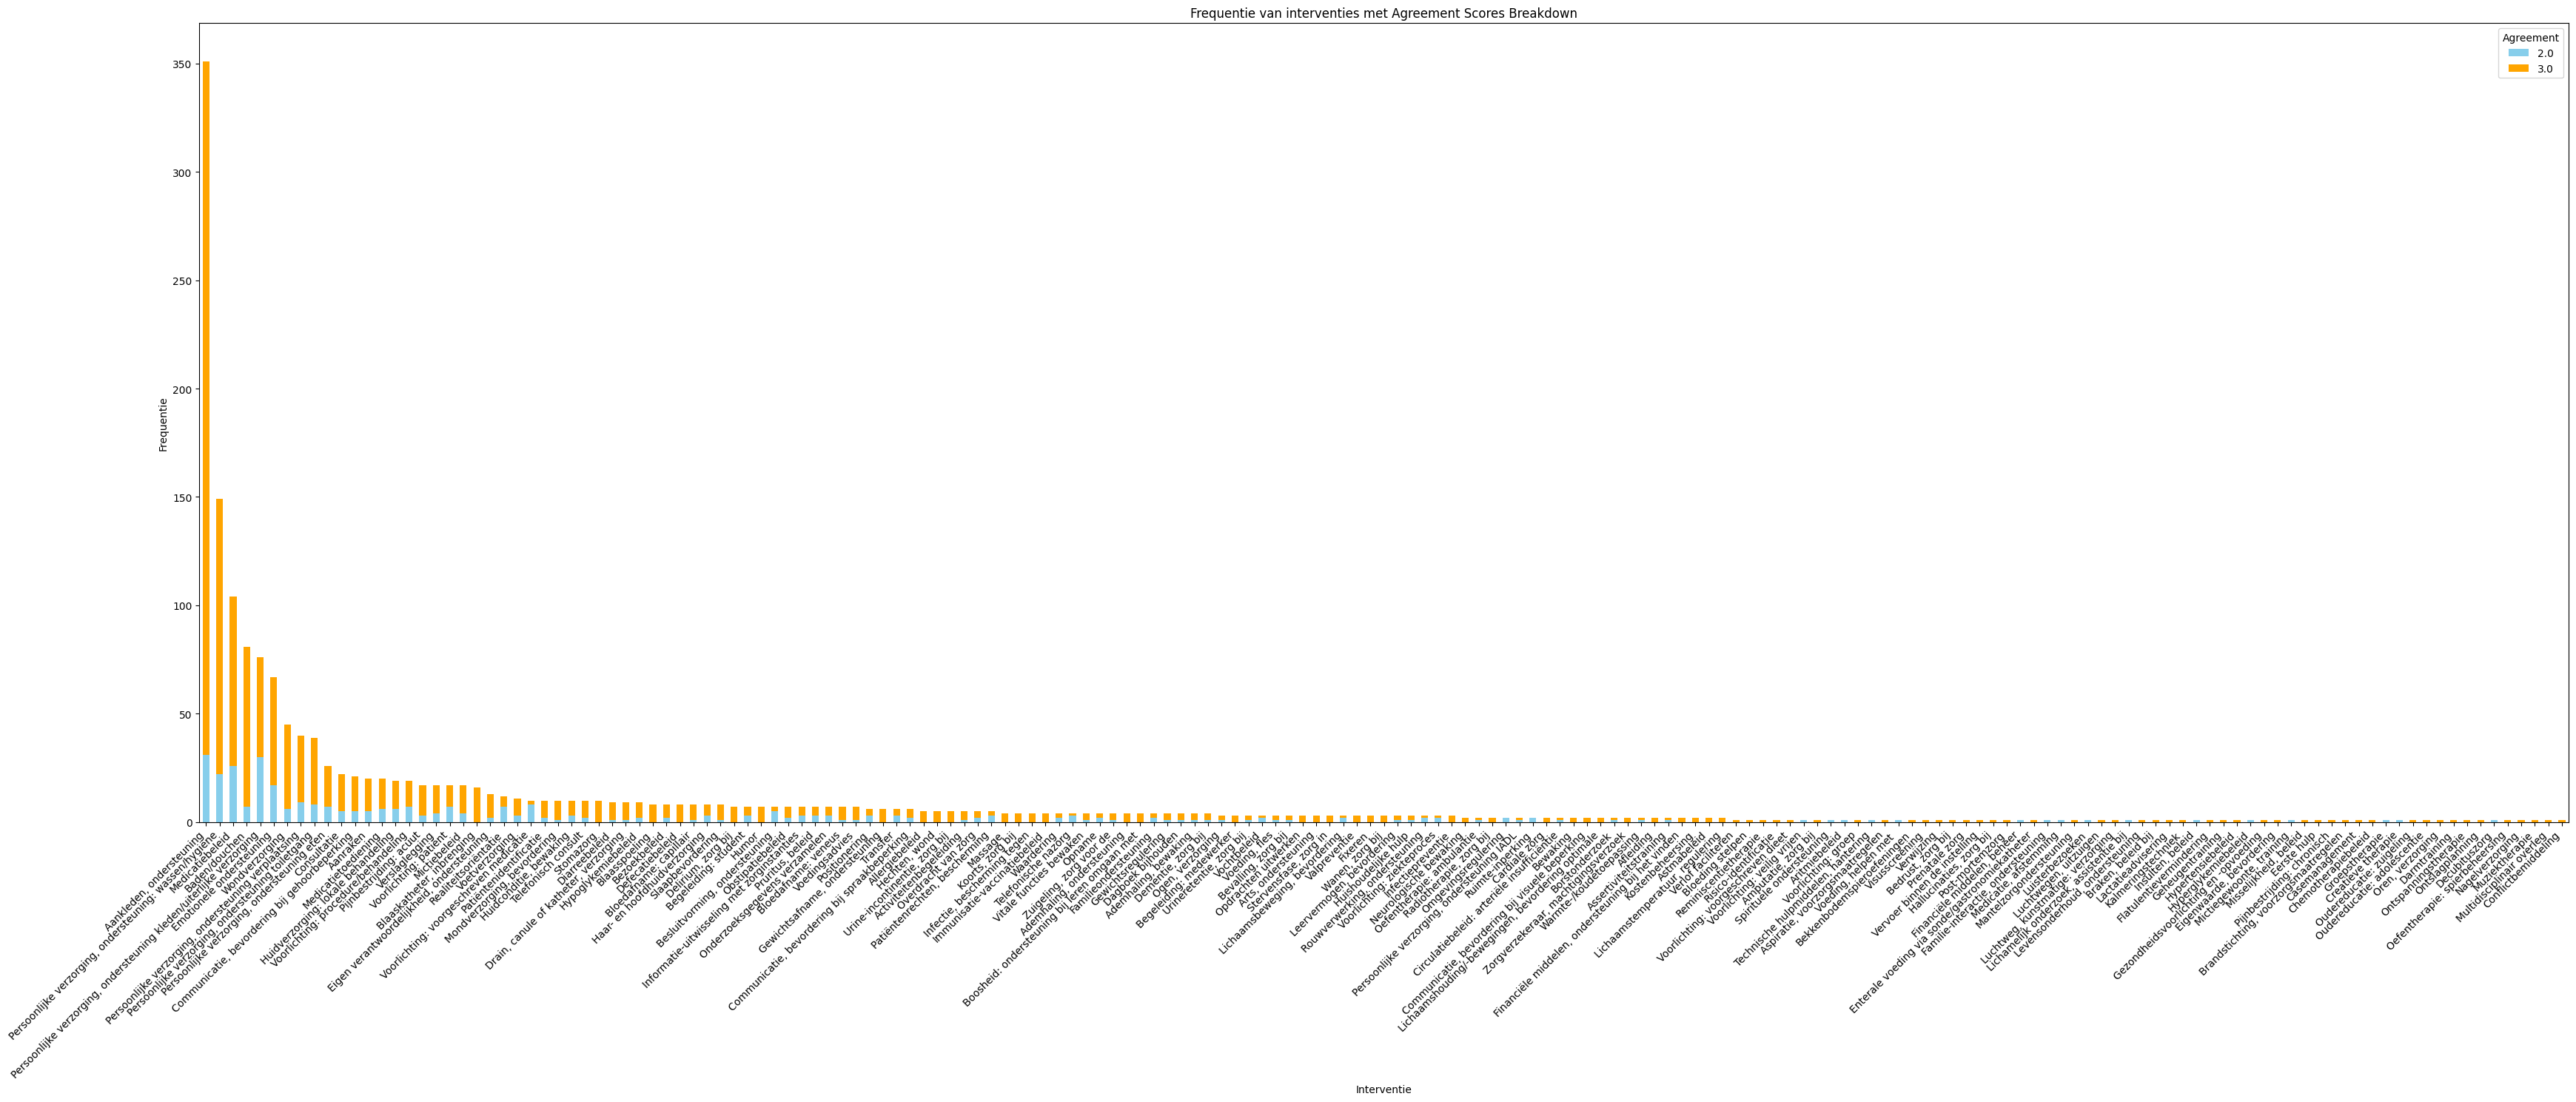

In [ ]:
# Create a pivot table to count the occurrences of each value in 'Intervention_final' grouped by 'Agreement'
pivot_table = df_event_log.pivot_table(index='Intervention_final', columns='Agreement', aggfunc='size', fill_value=0)

# Calculate the total counts for each 'Intervention_final' to sort by
pivot_table['Total'] = pivot_table.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
pivot_table_sorted = pivot_table.sort_values(by='Total', ascending=False)

# Drop the 'Total' column after sorting
pivot_table_sorted = pivot_table_sorted.drop(columns='Total')

# Plotting the stacked bar chart with a wider figure
plt.figure(figsize=(35, 15))

# Plot the stacked bar chart
pivot_table_sorted.plot(kind='bar', stacked=True, figsize=(35, 15), color=['skyblue', 'orange'])

# Add titles and labels
plt.title('Frequentie van interventies met Agreement Scores Breakdown')
plt.xlabel('Interventie')
plt.ylabel('Frequentie')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

<Figure size 3500x1500 with 0 Axes>

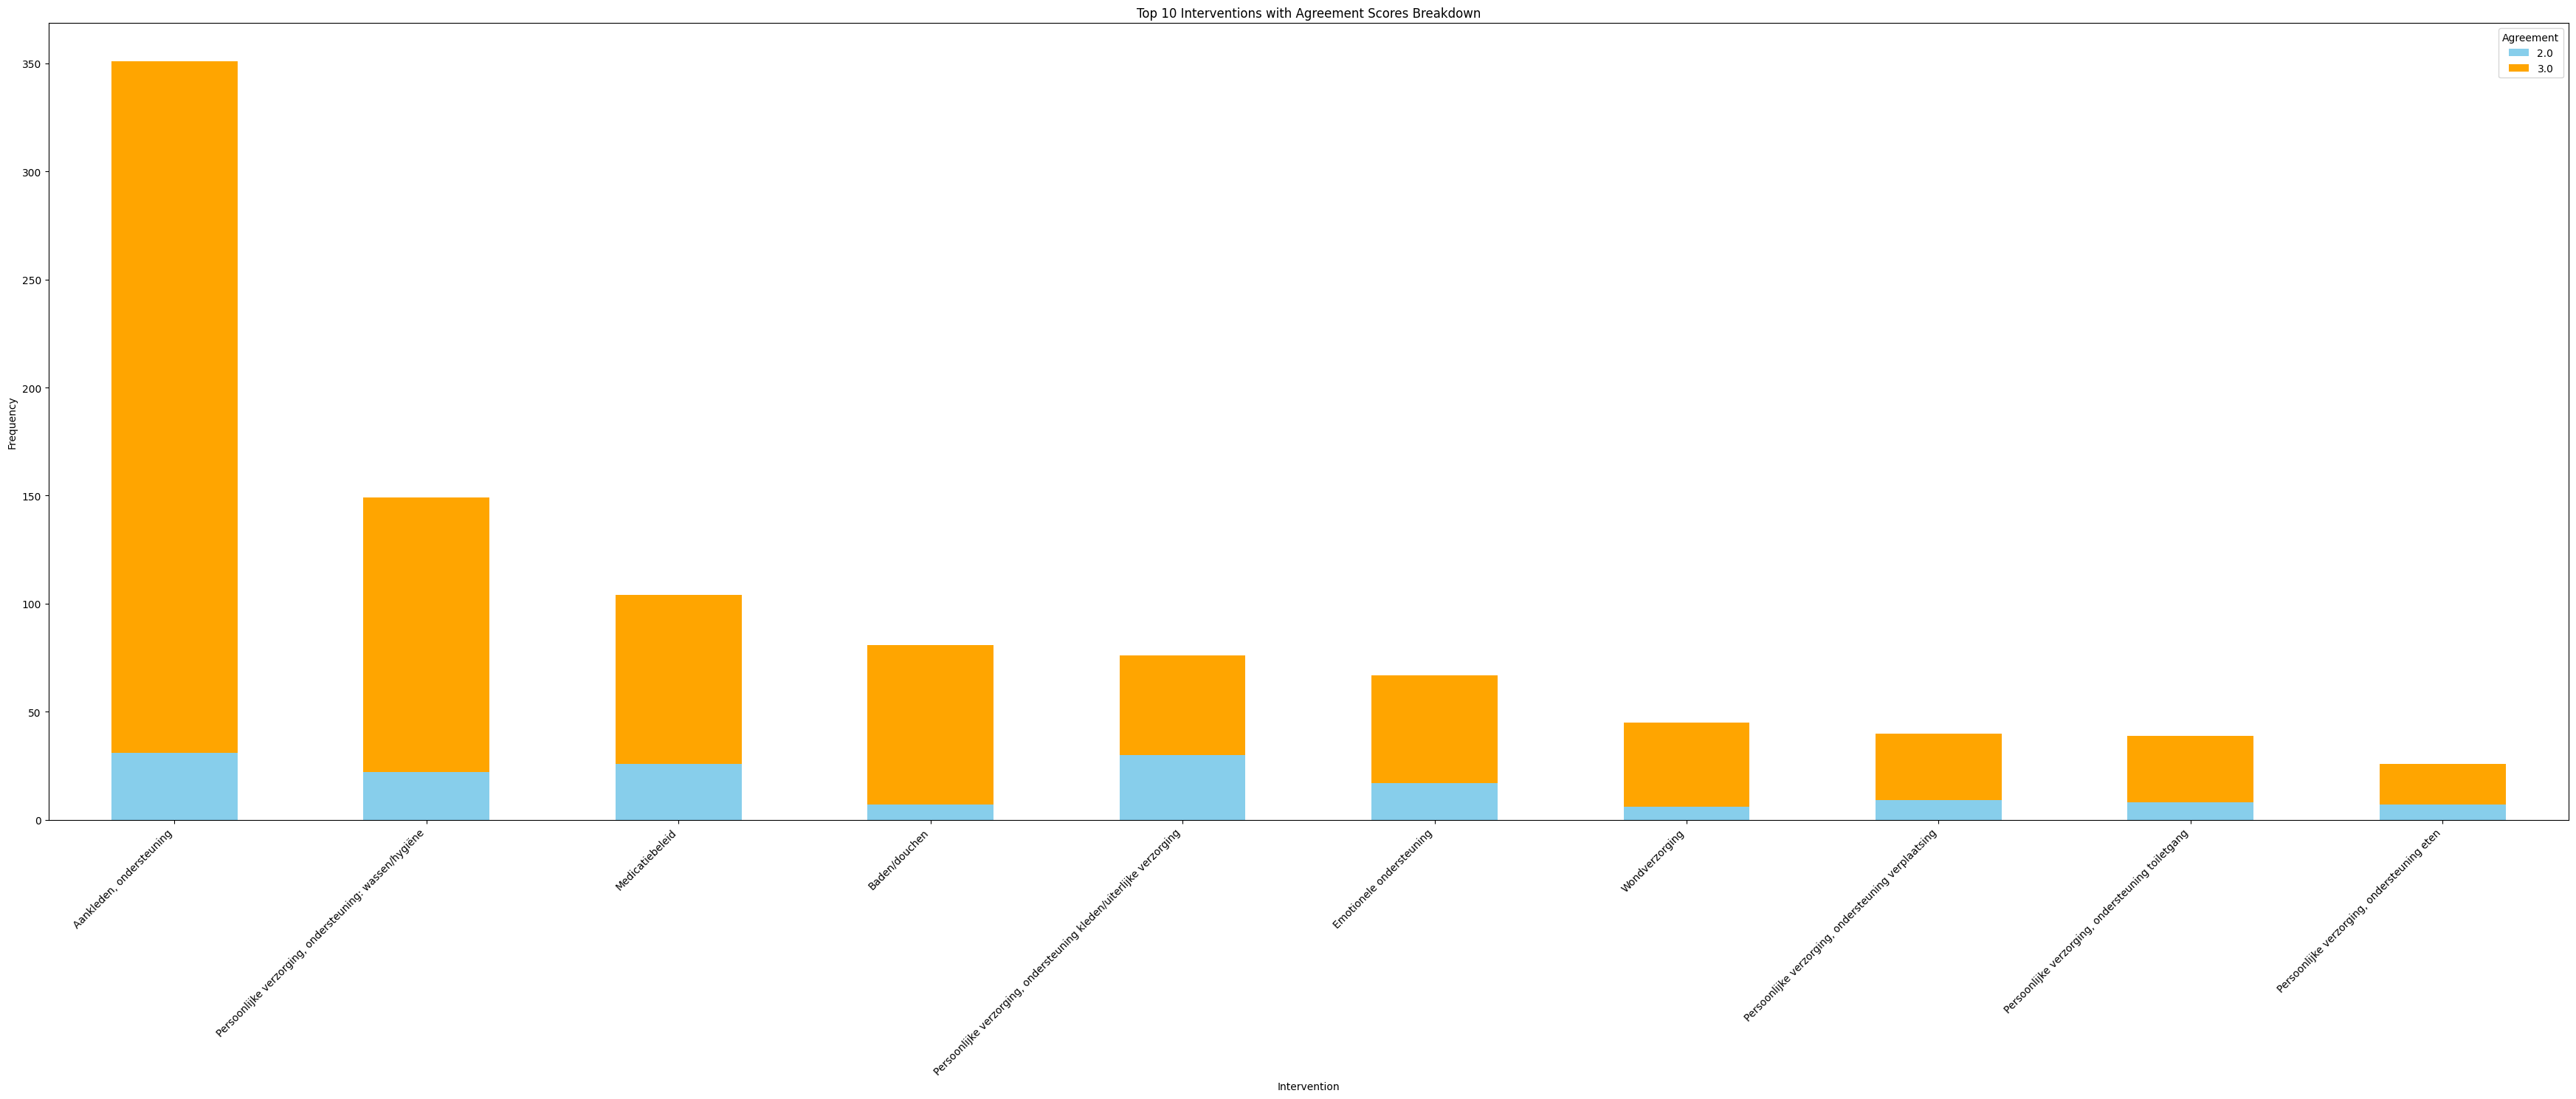

In [ ]:
# Create a pivot table to count the occurrences of each value in 'Intervention_final' grouped by 'Agreement'
pivot_table = df_event_log.pivot_table(index='Intervention_final', columns='Agreement', aggfunc='size', fill_value=0)

# Calculate the total counts for each 'Intervention_final' to sort by
pivot_table['Total'] = pivot_table.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order and select only the top 10 rows
pivot_table_top10 = pivot_table.sort_values(by='Total', ascending=False).head(10)

# Drop the 'Total' column after selecting top 10
pivot_table_top10 = pivot_table_top10.drop(columns='Total')

# Plotting the stacked bar chart with a wider figure
plt.figure(figsize=(35, 15))

# Plot the stacked bar chart with only the top 10 interventions
pivot_table_top10.plot(kind='bar', stacked=True, figsize=(35, 15), color=['skyblue', 'orange'])

# Add titles and labels
plt.title('Top 10 Interventions with Agreement Scores Breakdown')
plt.xlabel('Intervention')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


In [ ]:
pivot_table_top10

Agreement                                           2.0  3.0
Intervention_final                                          
Aankleden, ondersteuning                             31  320
Persoonlijke verzorging, ondersteuning: wassen/...   22  127
Medicatiebeleid                                      26   78
Baden/douchen                                         7   74
Persoonlijke verzorging, ondersteuning kleden/u...   30   46
Emotionele ondersteuning                             17   50
Wondverzorging                                        6   39
Persoonlijke verzorging, ondersteuning verplaat...    9   31
Persoonlijke verzorging, ondersteuning toiletgang     8   31
Persoonlijke verzorging, ondersteuning eten           7   19

<Figure size 1000x800 with 0 Axes>

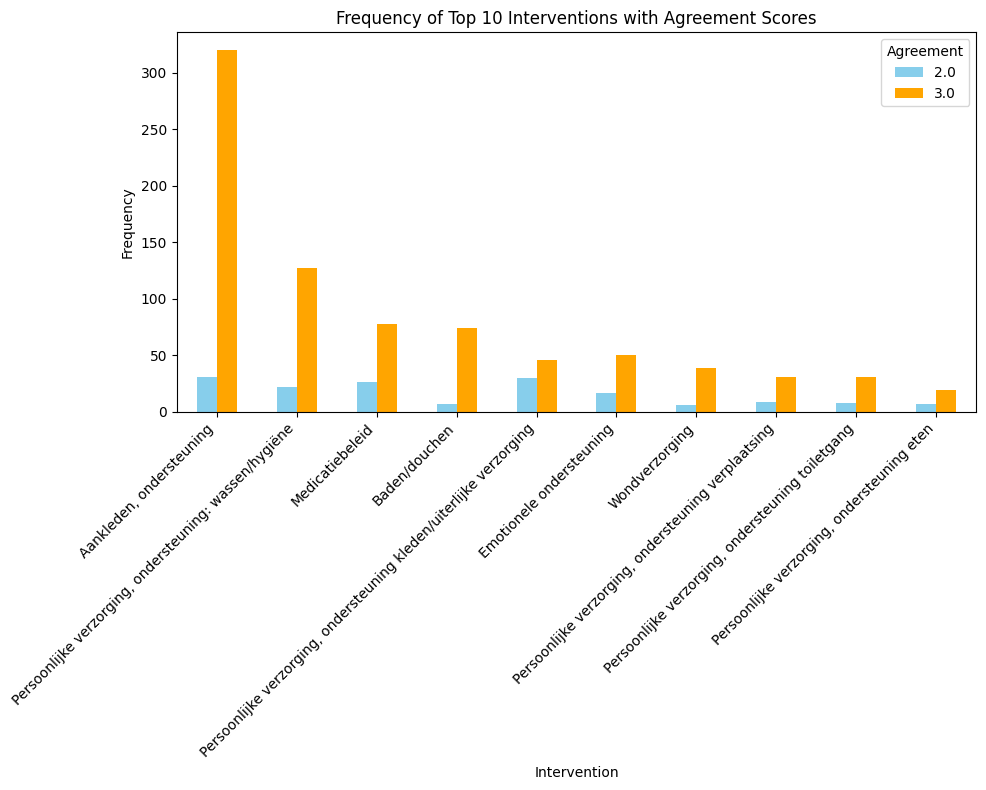

In [ ]:

# Create a pivot table to count occurrences of each value in 'Intervention_final' grouped by 'Agreement'
pivot_table = df_event_log.pivot_table(index='Intervention_final', columns='Agreement', aggfunc='size', fill_value=0)

# Calculate the total counts for each 'Intervention_final' to sort by
pivot_table['Total'] = pivot_table.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
pivot_table_sorted = pivot_table.sort_values(by='Total', ascending=False)

# Select the top 10 rows based on the 'Total' column
pivot_table_top10 = pivot_table_sorted.head(10)

# Drop the 'Total' column after selecting the top 10
pivot_table_top10 = pivot_table_top10.drop(columns='Total')

# Plotting the grouped bar chart with a wider figure
plt.figure(figsize=(10, 8))

# Plot the grouped bar chart for the top 10 interventions
pivot_table_top10.plot(kind='bar', stacked=False, figsize=(10, 8), color=['skyblue', 'orange'])

# Add titles and labels
plt.title('Frequency of Top 10 Interventions with Agreement Scores')
plt.xlabel('Intervention')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


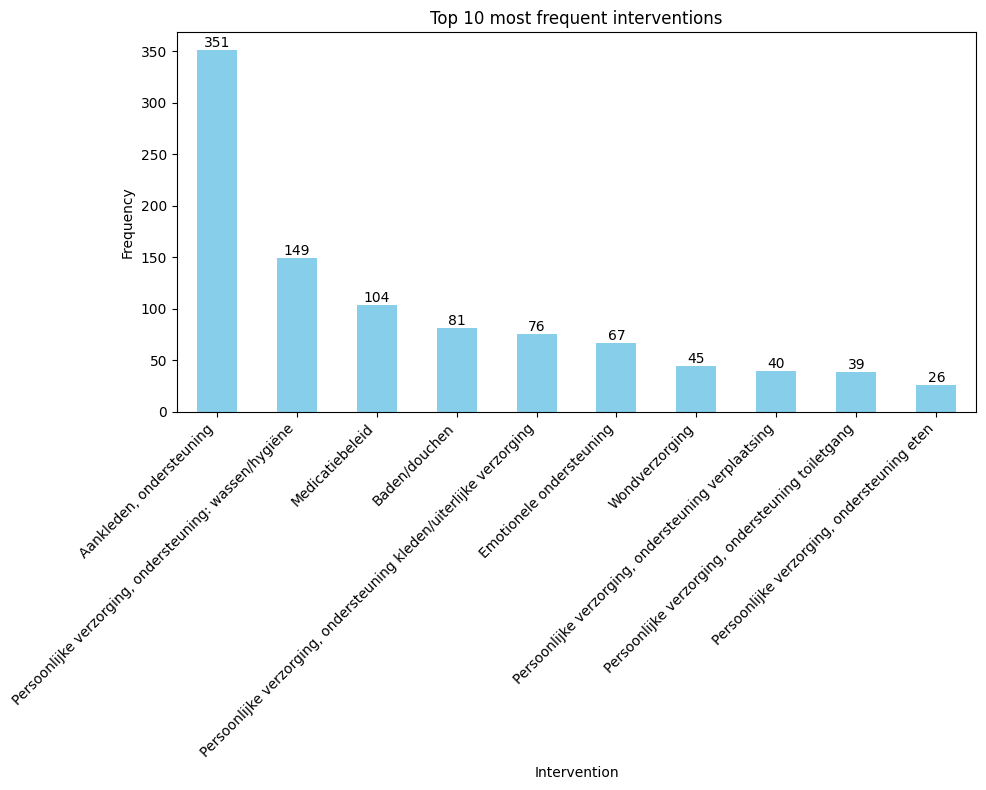

In [ ]:
# Count the occurrences of each value in 'Intervention_final'
value_counts = df_event_log['Intervention_final'].value_counts()

# Select the top 10 most frequent values
top_10_values = value_counts.head(10)

# Plot the bar chart for the top 10 values
plt.figure(figsize=(10, 8))
ax = top_10_values.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Top 10 most frequent interventions')
plt.xlabel('Intervention')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate bars with the frequency values
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


# Evaluation

In [ ]:
# Step 1: Get the top 10 most frequent values for 'Intervention_final'
value_counts = df_event_log['Intervention_final'].value_counts()
top_10_values = value_counts.head(10).index

# Step 2: Filter the DataFrame to include only rows with top 10 values
filtered_df = df_event_log[df_event_log['Intervention_final'].isin(top_10_values)]

filtered_df

Transcript number District nurse present Patient present  \
21                    1                   DN01             P01   
27                    1                   DN01             P01   
33                    1                   DN01             P01   
47                    1                   DN01             P01   
48                    1                   DN01             P01   
...                 ...                    ...             ...   
3847                 27                   DN03             P27   
3852                 27                   DN03             P27   
3855                 27                   DN03             P27   
3856                 27                   DN03             P27   
3857                 27                   DN03             P27   

                Timestamp                                               Text  \
21    2023-09-12 08:49:35  Verpleegkundige: Moeten we de haren wassen van...   
27    2023-09-12 08:49:50  Verpleegkundige: Nou u tilt hem nog wel gemakk...   
33    2023-09-12 08:50:20  Verpleegkundige: Nu al een beetje misschien?; ...   
47    2023-09-12 08:51:22  Verpleegkundige: Zal ik beginnen met de spons?...   
48    2023-09-12 08:51:25  Verpleegkundige: Daar komt die, het is wel moo...   
...                   ...                                                ...   
3847  2023-12-05 09:04:25  Verpleegkundige: Deze is voor boven.; Patient:...   
3852  2023-12-05 09:04:57  Verpleegkundige: Ja, want die moet eruit voor ...   
3855  2023-12-05 09:05:05  Verpleegkundige: Kijken of het lukt en als het...   
3856  2023-12-05 09:05:07  Verpleegkundige: Ja, daarom. Nou leeg potje hi...   
3857  2023-12-05 09:05:08  Verpleegkundige: Ja, dat heb ik al gedaan. Ik ...   

                                        Intervention_R1  \
21    Persoonlijke verzorging, ondersteuning: wassen...   
27                             Aankleden, ondersteuning   
33                             Aankleden, ondersteuning   
47                                        Baden/douchen   
48                                       Wondverzorging   
...                                                 ...   
3847                                    Medicatiebeleid   
3852                                    Medicatiebeleid   
3855                                    Medicatiebeleid   
3856                                   Actief luisteren   
3857  Persoonlijke verzorging, ondersteuning toiletgang   

                                     ENG_R1                   Class_R1  \
21    Self-Care Assistance: Bathing/Hygiene     Self-care facilitation   
27                                 Dressing     Self-care facilitation   
33                                 Dressing     Self-care facilitation   
47                                  Bathing     Self-care facilitation   
48                               Wound Care      Skin/Wound Management   
...                                     ...                        ...   
3847                  Medication Management      Medication Management   
3852                  Medication Management      Medication Management   
3855                  Medication Management      Medication Management   
3856                       Active Listening  Communication enhancement   
3857        Self-Care Assistance: Toileting     Elimination management   

                   Domain_R1  \
21      Physiological: basic   
27      Physiological: basic   
33      Physiological: basic   
47      Physiological: basic   
48    Physiological: complex   
...                      ...   
3847  Physiological: complex   
3852  Physiological: complex   
3855  Physiological: complex   
3856              Behavioral   
3857    Physiological: basic   

                                        Intervention_R2  ...  \
21    Persoonlijke verzorging, ondersteuning: wassen...  ...   
27                             Aankleden, ondersteuning  ...   
33                             Aankleden, ondersteuning  ...   
47           

In [ ]:
# Step 3: Randomly select 100 rows from the filtered DataFrame
# If there are fewer than 100 rows in the filtered DataFrame, it will select all available rows.
sampled_df = filtered_df.sample(n=100)  # Setting random_state for reproducibility

# Step 4: Write the resulting DataFrame to a CSV file
sampled_df.to_csv('filtered_sampled_data.csv', index=False)

In [ ]:
# Print the frequency of each value in 'Transcript number'
print("Frequency of each value in 'Transcript number':")
print(sampled_df['Transcript number'].value_counts())

# Print the frequency of each value in 'District nurse present'
print("\nFrequency of each value in 'District nurse present':")
print(sampled_df['District nurse present'].value_counts())

# Print the frequency of each value in 'Intervention_final'
print("\nFrequency of each value in 'Intervention_final':")
print(sampled_df['Intervention_final'].value_counts())

Frequency of each value in 'Transcript number':
Transcript number
25    10
26    10
5      9
24     7
22     7
1      6
8      6
17     5
20     4
18     4
6      4
27     4
7      4
10     3
4      3
11     3
12     2
2      2
15     2
9      2
23     1
13     1
14     1
Name: count, dtype: int64

Frequency of each value in 'District nurse present':
District nurse present
DN02    47
DN03    31
DN01    22
Name: count, dtype: int64

Frequency of each value in 'Intervention_final':
Intervention_final
Aankleden, ondersteuning                                               36
Persoonlijke verzorging, ondersteuning: wassen/hygiëne                 13
Medicatiebeleid                                                        11
Emotionele ondersteuning                                               10
Persoonlijke verzorging, ondersteuning kleden/uiterlijke verzorging     9
Persoonlijke verzorging, ondersteuning eten                             6
Baden/douchen                                       

In [ ]:
df_evaluated_commonsense = pd.read_csv('Workbook for common sense evaluation.csv', encoding='ISO-8859-1', delimiter=';')

df_evaluated_commonsense

Text  \
0   Verpleegkundige: Ja, ja. Nou, maar goed, dan i...   
1   Verpleegkundige: En had u vrijdag nog gedoucht...   
2   Verpleegkundige: Nou wat fijn. ; Patient: Ik w...   
3   Verpleegkundige: De pleisters? Ja, doe ik als ...   
4   Verpleegkundige: Hemdje aan. ; Patient: ik heb...   
..                                                ...   
95              Verpleegkundige: Ik heb een luie dag.   
96  Verpleegkundige: Zal ik beginnen met de spons?...   
97  Verpleegkundige: Ik zeg nee, nou, misschien is...   
98  Verpleegkundige: Ja, uk kan elke dag wel wat a...   
99  Verpleegkundige: Ja, dat snap ik ja en ik denk...   

                                   Intervention_final             Class_final  \
0                            Emotionele ondersteuning       Coping assistance   
1                                       Baden/douchen  Self-care facilitation   
2                            Aankleden, ondersteuning  Self-care facilitation   
3   Persoonlijke verzorging, ondersteuning kleden/...  Self-care facilitation   
4                            Aankleden, ondersteuning  Self-care facilitation   
..                                                ...                     ...   
95                           Emotionele ondersteuning       Coping assistance   
96                                      Baden/douchen  Self-care facilitation   
97  Persoonlijke verzorging, ondersteuning: wassen...  Self-care facilitation   
98                           Aankleden, ondersteuning  Self-care facilitation   
99                           Emotionele ondersteuning       Coping assistance   

            Domain_final  Agreement                     Class_final_NL  \
0             Behavioral          3  Hulp bij het omgaan met problemen   
1   Physiological: basic          3          Facilitering van zelfzorg   
2   Physiological: basic          3          Facilitering van zelfzorg   
3   Physiological: basic          2          Facilitering van zelfzorg   
4   Physiological: basic          3          Facilitering van zelfzorg   
..                   ...        ...                                ...   
95            Behavioral          3  Hulp bij het omgaan met problemen   
96  Physiological: basic          3          Facilitering van zelfzorg   
97  Physiological: basic          3          Facilitering van zelfzorg   
98  Physiological: basic          3          Facilitering van zelfzorg   
99            Behavioral          3  Hulp bij het omgaan met problemen   

         Domain_final_NL               Evaluatie interventie  
0           Gedragsmatig                 Een beetje mee eens  
1   Fysiologisch: basaal  Interventie klopt niet, klasse wel  
2   Fysiologisch: basaal                   Helemaal mee eens  
3   Fysiologisch: basaal     Interventie klopt helemaal niet  
4   Fysiologisch: basaal                   Helemaal mee eens  
..                   ...                                 ...  
95          Gedragsmatig            Onduidelijk uit de tekst  
96  Fysiologisch: basaal                   Helemaal mee eens  
97  Fysiologisch: basaal                 Een beetje mee eens  
98  Fysiologisch: basaal                   Helemaal mee eens  
99          Gedragsmatig                   Helemaal mee eens  

[100 rows x 8 columns]

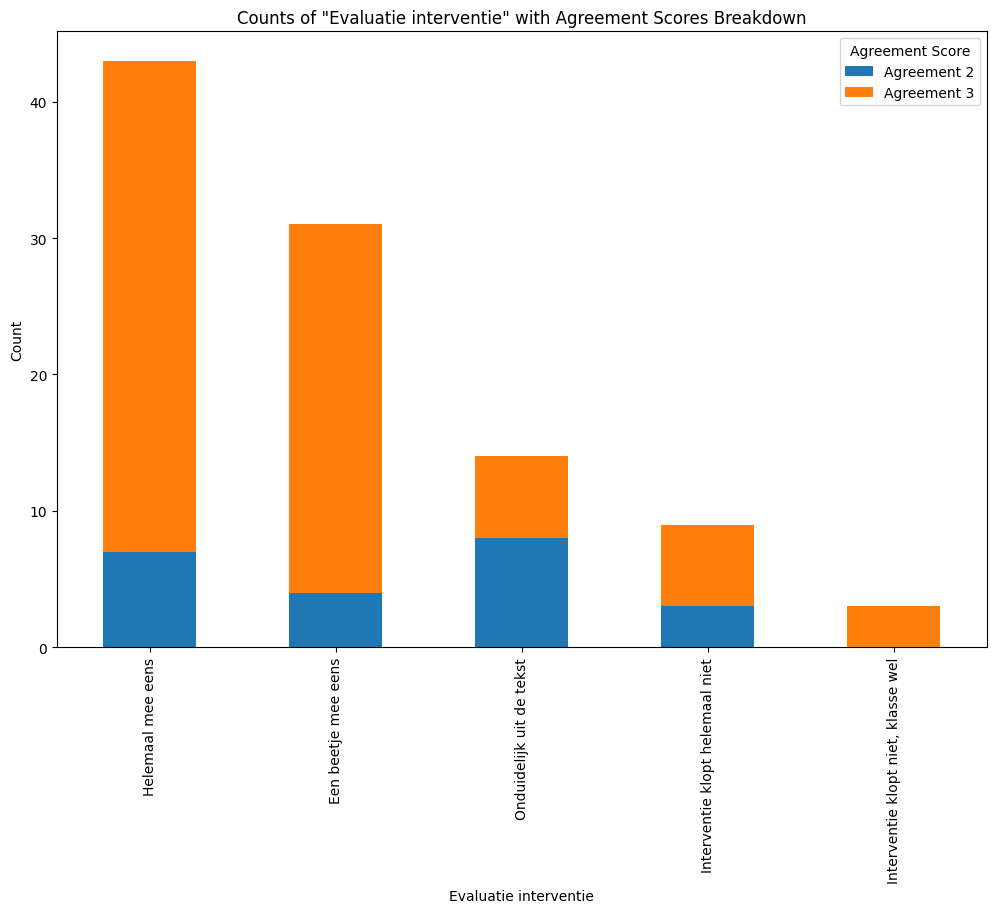

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Agreement scores of 2 and 3
df_agreement_2 = df_evaluated_commonsense[df_evaluated_commonsense['Agreement'] == 2]
df_agreement_3 = df_evaluated_commonsense[df_evaluated_commonsense['Agreement'] == 3]

# Count occurrences in 'Evaluatie interventie' for each Agreement score
count_agreement_2 = df_agreement_2['Evaluatie interventie'].value_counts()
count_agreement_3 = df_agreement_3['Evaluatie interventie'].value_counts()

# Align the indices by filling missing values with 0
combined_counts = pd.DataFrame({
    'Agreement 2': count_agreement_2,
    'Agreement 3': count_agreement_3
}).fillna(0)

# Calculate total counts for ordering
combined_counts['Total'] = combined_counts.sum(axis=1)

# Sort by total counts
combined_counts = combined_counts.sort_values(by='Total', ascending=False)

# Drop the 'Total' column as it's no longer needed
combined_counts = combined_counts.drop(columns='Total')

# Plotting the stacked bar chart
combined_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])
plt.title('Counts of "Evaluatie interventie" with Agreement Scores Breakdown')
plt.xlabel('Evaluatie interventie')
plt.ylabel('Count')
plt.legend(title='Agreement Score')
plt.show()

# Explorative box plot

<ipython-input-409-b15cc665a546>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Intervention_final'] = pd.Categorical(filtered_df['Intervention_final'], categories=sorted_valid_values, ordered=True)


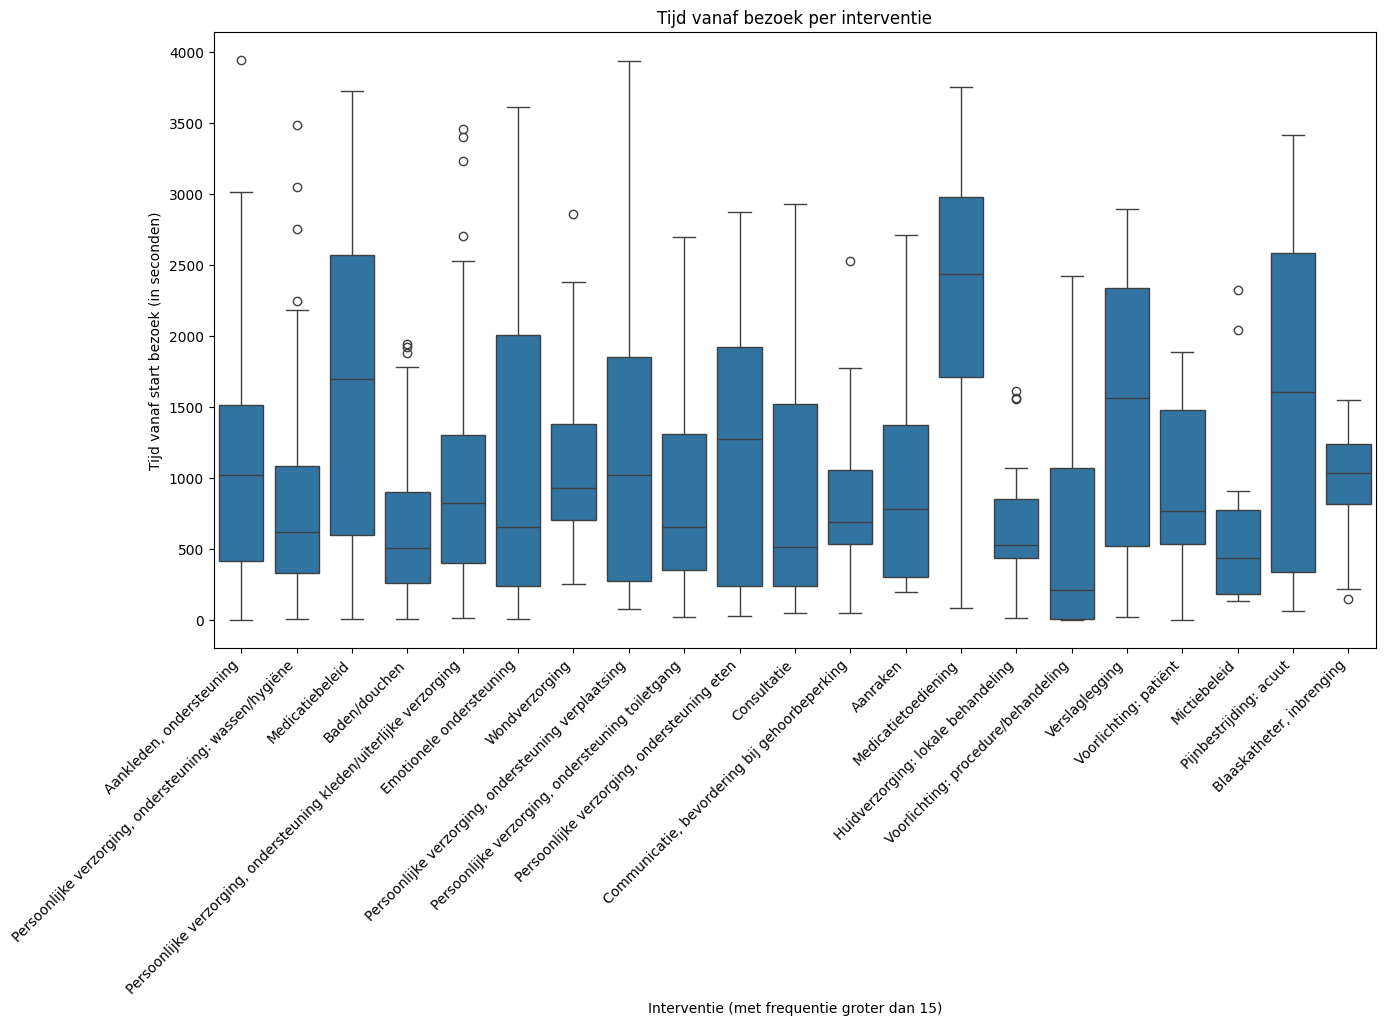

In [ ]:
# Count occurrences of each value in 'Intervention_final'
value_counts = df_event_log['Intervention_final'].value_counts()

# Filter values that occur at least 15 times
valid_values = value_counts[value_counts >= 15].index

# Filter DataFrame
filtered_df = df_event_log[df_event_log['Intervention_final'].isin(valid_values)]

# Sort valid values by their counts in descending order
sorted_valid_values = value_counts[valid_values].sort_values(ascending=False).index

# Reorder the filtered DataFrame according to the sorted interventions
filtered_df['Intervention_final'] = pd.Categorical(filtered_df['Intervention_final'], categories=sorted_valid_values, ordered=True)

# Create a box plot with seaborn
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='Intervention_final', y='time_from_start', data=filtered_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Tijd vanaf bezoek per interventie')
plt.xlabel('Interventie (met frequentie groter dan 15)')
plt.ylabel('Tijd vanaf start bezoek (in seconden)')

plt.show()

# Compare quarters

In [ ]:
# Calculate the total duration for each transcript
total_durations = df_event_log.groupby('Transcript number')['time_from_start'].max()

# Function to determine the quarter
def determine_quarter(row, total_durations):
    transcript_number = row['Transcript number']
    time_from_start = row['time_from_start']

    # Get the total duration for this transcript
    total_duration = total_durations[transcript_number]

    # Calculate the thresholds for the quarters
    quarter_thresholds = [total_duration * (i / 4) for i in range(1, 5)]

    # Determine the quarter
    if time_from_start <= quarter_thresholds[0]:
        return 'Q1'
    elif time_from_start <= quarter_thresholds[1]:
        return 'Q2'
    elif time_from_start <= quarter_thresholds[2]:
        return 'Q3'
    else:
        return 'Q4'

# Apply the function to create the 'Quarter' column
df_event_log['Quarter'] = df_event_log.apply(determine_quarter, axis=1, total_durations=total_durations)

df_event_log

<ipython-input-410-46e7b5def935>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_log['Quarter'] = df_event_log.apply(determine_quarter, axis=1, total_durations=total_durations)


Transcript number District nurse present Patient present  \
0                     1                   DN01             P01   
5                     1                   DN01             P01   
13                    1                   DN01             P01   
15                    1                   DN01             P01   
21                    1                   DN01             P01   
...                 ...                    ...             ...   
3850                 27                   DN03             P27   
3852                 27                   DN03             P27   
3855                 27                   DN03             P27   
3856                 27                   DN03             P27   
3857                 27                   DN03             P27   

                Timestamp                                               Text  \
0     2023-09-12 08:48:00  Verpleegkundige: Ja nou, daar gaan we weer. Ik...   
5     2023-09-12 08:48:26  Verpleegkundige: Wat zegt u?; Patient: Wat het...   
13    2023-09-12 08:49:12  Verpleegkundige: Wie is dit?; Patient: Dat is ...   
15    2023-09-12 08:49:20  Verpleegkundige: Ja, hij hangt weer ja, maar h...   
21    2023-09-12 08:49:35  Verpleegkundige: Moeten we de haren wassen van...   
...                   ...                                                ...   
3850  2023-12-05 09:04:44  Verpleegkundige: Ja, haal ik er weer helemaal ...   
3852  2023-12-05 09:04:57  Verpleegkundige: Ja, want die moet eruit voor ...   
3855  2023-12-05 09:05:05  Verpleegkundige: Kijken of het lukt en als het...   
3856  2023-12-05 09:05:07  Verpleegkundige: Ja, daarom. Nou leeg potje hi...   
3857  2023-12-05 09:05:08  Verpleegkundige: Ja, dat heb ik al gedaan. Ik ...   

                                        Intervention_R1  \
0                   Voorlichting: procedure/behandeling   
5                                  Realiteitsoriëntatie   
13                                 Realiteitsoriëntatie   
15                                     Actief luisteren   
21    Persoonlijke verzorging, ondersteuning: wassen...   
...                                                 ...   
3850  Persoonlijke verzorging, ondersteuning kleden/...   
3852                                    Medicatiebeleid   
3855                                    Medicatiebeleid   
3856                                   Actief luisteren   
3857  Persoonlijke verzorging, ondersteuning toiletgang   

                                       ENG_R1                   Class_R1  \
0               Teaching: Procedure/Treatment           Health education   
5                         Reality Orientation          Cognitive therapy   
13                        Reality Orientation          Cognitive therapy   
15                           Active Listening  Communication enhancement   
21      Self-Care Assistance: Bathing/Hygiene     Self-care facilitation   
...                                       ...                        ...   
3850  Self-Care Assistance: Dressing/Grooming     Self-care facilitation   
3852                    Medication Management      Medication Management   
3855                    Medication Management      Medication Management   
3856                         Active Listening  Communication enhancement   
3857          Self-Care Assistance: Toileting     Elimination management   

                   Domain_R1  \
0                 Behavioral   
5                 Behavioral   
13                Behavioral   
15                Behavioral   
21      Physiological: basic   
...                      ...   
3850    Physiological: basic   
3852  Physiological: complex   
3855  Physiological: complex   
3856              Behavioral   
3857    Physiological: basic   

                                        Intervention_R2  ...  \
0                   Voorlichting: procedure/behandeling  ...   
5                                  Realiteitsoriëntatie  ...   
13                                 Realiteitsoriëntat

## Domain level

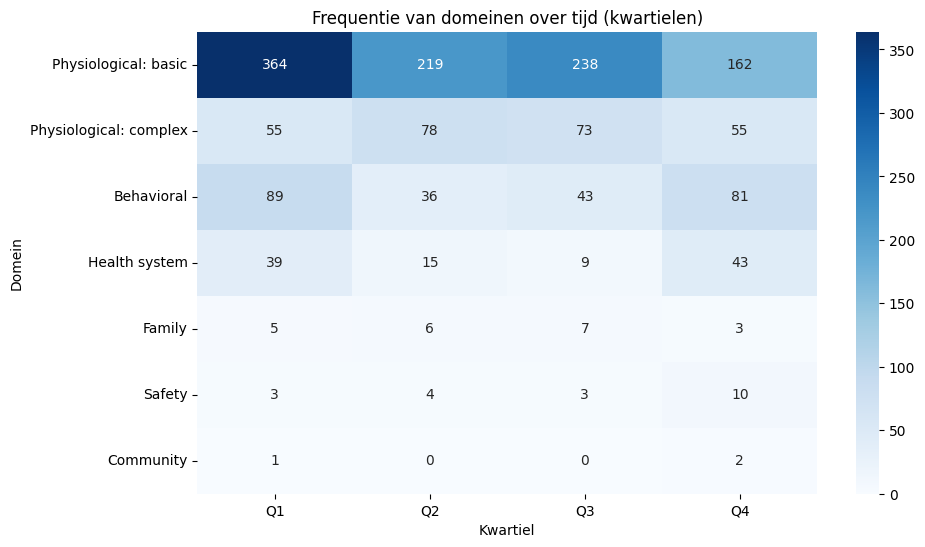

In [ ]:
# Aggregate the data
domain_quarter_counts = df_event_log.groupby(['Domain_final', 'Quarter']).size().unstack(fill_value=0)

# Calculate the total counts for each domain and sort by these counts in descending order
total_counts = domain_quarter_counts.sum(axis=1)
sorted_domain_quarter_counts = domain_quarter_counts.loc[total_counts.sort_values(ascending=False).index]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_domain_quarter_counts, annot=True, cmap='Blues', fmt='d')
plt.title('Frequentie van domeinen over tijd (kwartielen)')
plt.ylabel('Domein')
plt.xlabel('Kwartiel')
plt.show()

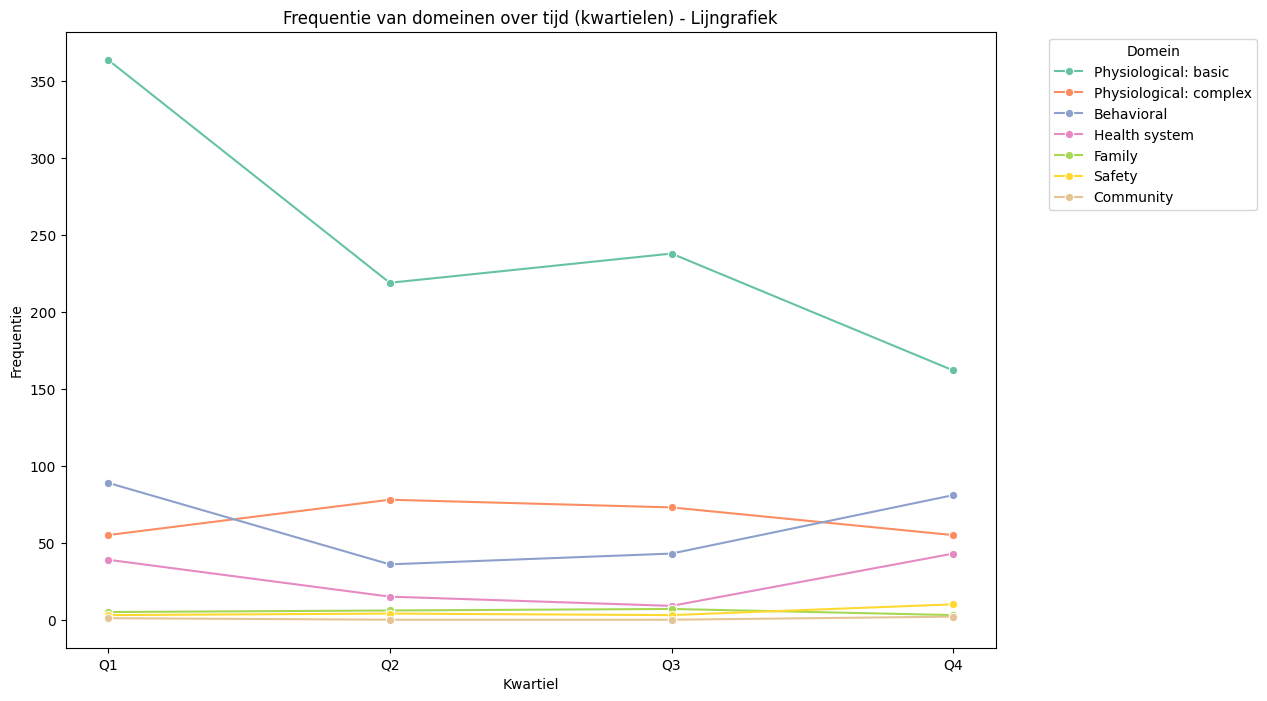

In [ ]:
# Aggregate the data
domain_quarter_counts = df_event_log.groupby(['Domain_final', 'Quarter']).size().unstack(fill_value=0)

# Calculate the total counts for each domain and sort by these counts in descending order
total_counts = domain_quarter_counts.sum(axis=1)
sorted_domains = total_counts.sort_values(ascending=False).index

# Reset index to prepare for plotting
domain_quarter_counts = domain_quarter_counts.reset_index()

# Melt the dataframe to long format
domain_quarter_melted = domain_quarter_counts.melt(id_vars='Domain_final', var_name='Quarter', value_name='Count')

# Define the order of quarters
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']

# Convert the 'Quarter' column to a categorical type with a specified order
domain_quarter_melted['Quarter'] = pd.Categorical(domain_quarter_melted['Quarter'], categories=quarter_order, ordered=True)

# Reorder the 'Domain_final' column according to the sorted order
domain_quarter_melted['Domain_final'] = pd.Categorical(domain_quarter_melted['Domain_final'], categories=sorted_domains, ordered=True)

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=domain_quarter_melted, x='Quarter', y='Count', hue='Domain_final', marker='o', palette='Set2')
plt.title('Frequentie van domeinen over tijd (kwartielen) - Lijngrafiek')
plt.ylabel('Frequentie')
plt.xlabel('Kwartiel')
plt.legend(title='Domein', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Class level

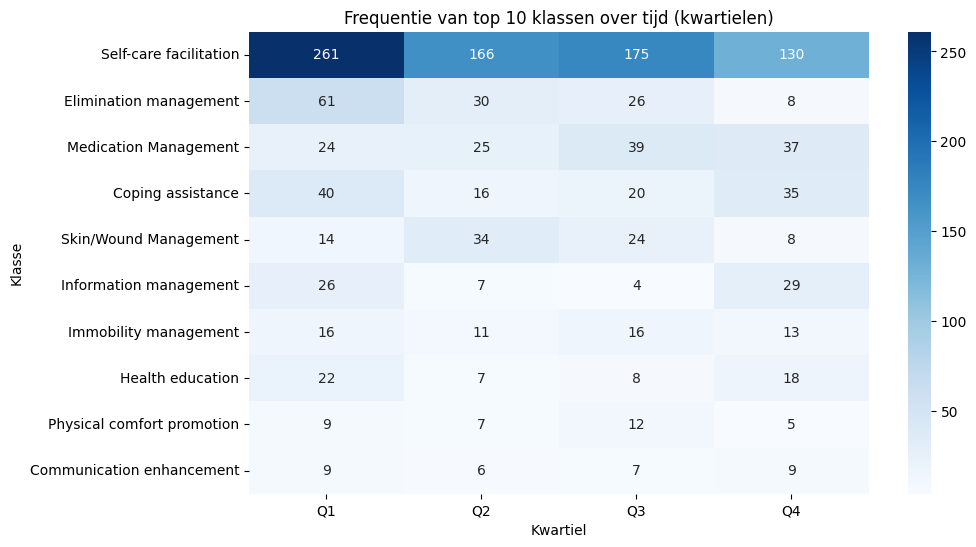

In [ ]:
# Aggregate the data by class and quarter
class_quarter_counts = df_event_log.groupby(['Class_final', 'Quarter']).size().unstack(fill_value=0)

# Calculate the total occurrences of each class
class_totals = class_quarter_counts.sum(axis=1)

# Get the top 10 classes
top_10_classes = class_totals.nlargest(10).index

# Filter the original data to keep only the top 10 classes
filtered_class_quarter_counts = class_quarter_counts.loc[top_10_classes]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_class_quarter_counts, annot=True, cmap='Blues', fmt='d')
plt.title('Frequentie van top 10 klassen over tijd (kwartielen)')
plt.ylabel('Klasse')
plt.xlabel('Kwartiel')
plt.show()

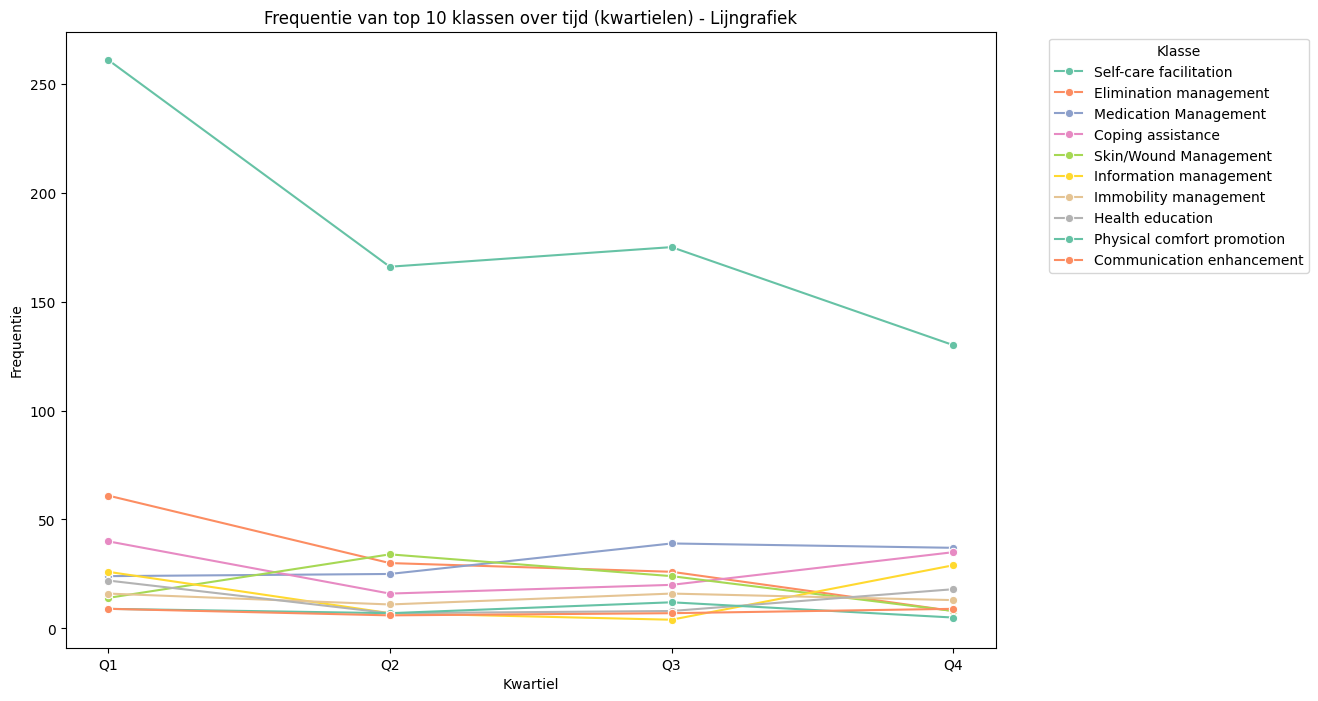

In [ ]:
# Aggregate the data by class and quarter
class_quarter_counts = df_event_log.groupby(['Class_final', 'Quarter']).size().unstack(fill_value=0)

# Calculate the total occurrences of each class
class_totals = class_quarter_counts.sum(axis=1)

# Get the top 10 classes
top_10_classes = class_totals.nlargest(10).index

# Filter the original data to keep only the top 10 classes
filtered_class_quarter_counts = class_quarter_counts.loc[top_10_classes]

# Sort the top 10 classes by total occurrences
sorted_top_10_classes = filtered_class_quarter_counts.sum(axis=1).sort_values(ascending=False).index

# Reset index to prepare for plotting
filtered_class_quarter_counts = filtered_class_quarter_counts.loc[sorted_top_10_classes].reset_index()

# Melt the dataframe to long format
filtered_class_quarter_melted = filtered_class_quarter_counts.melt(id_vars='Class_final', var_name='Quarter', value_name='Count')

# Define the order of quarters
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']

# Convert the 'Quarter' column to a categorical type with a specified order
filtered_class_quarter_melted['Quarter'] = pd.Categorical(filtered_class_quarter_melted['Quarter'], categories=quarter_order, ordered=True)

# Reorder the 'Class_final' column according to the sorted order
filtered_class_quarter_melted['Class_final'] = pd.Categorical(filtered_class_quarter_melted['Class_final'], categories=sorted_top_10_classes, ordered=True)

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_class_quarter_melted, x='Quarter', y='Count', hue='Class_final', marker='o', palette='Set2')
plt.title('Frequentie van top 10 klassen over tijd (kwartielen) - Lijngrafiek')
plt.ylabel('Frequentie')
plt.xlabel('Kwartiel')
plt.legend(title='Klasse', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Intervention level

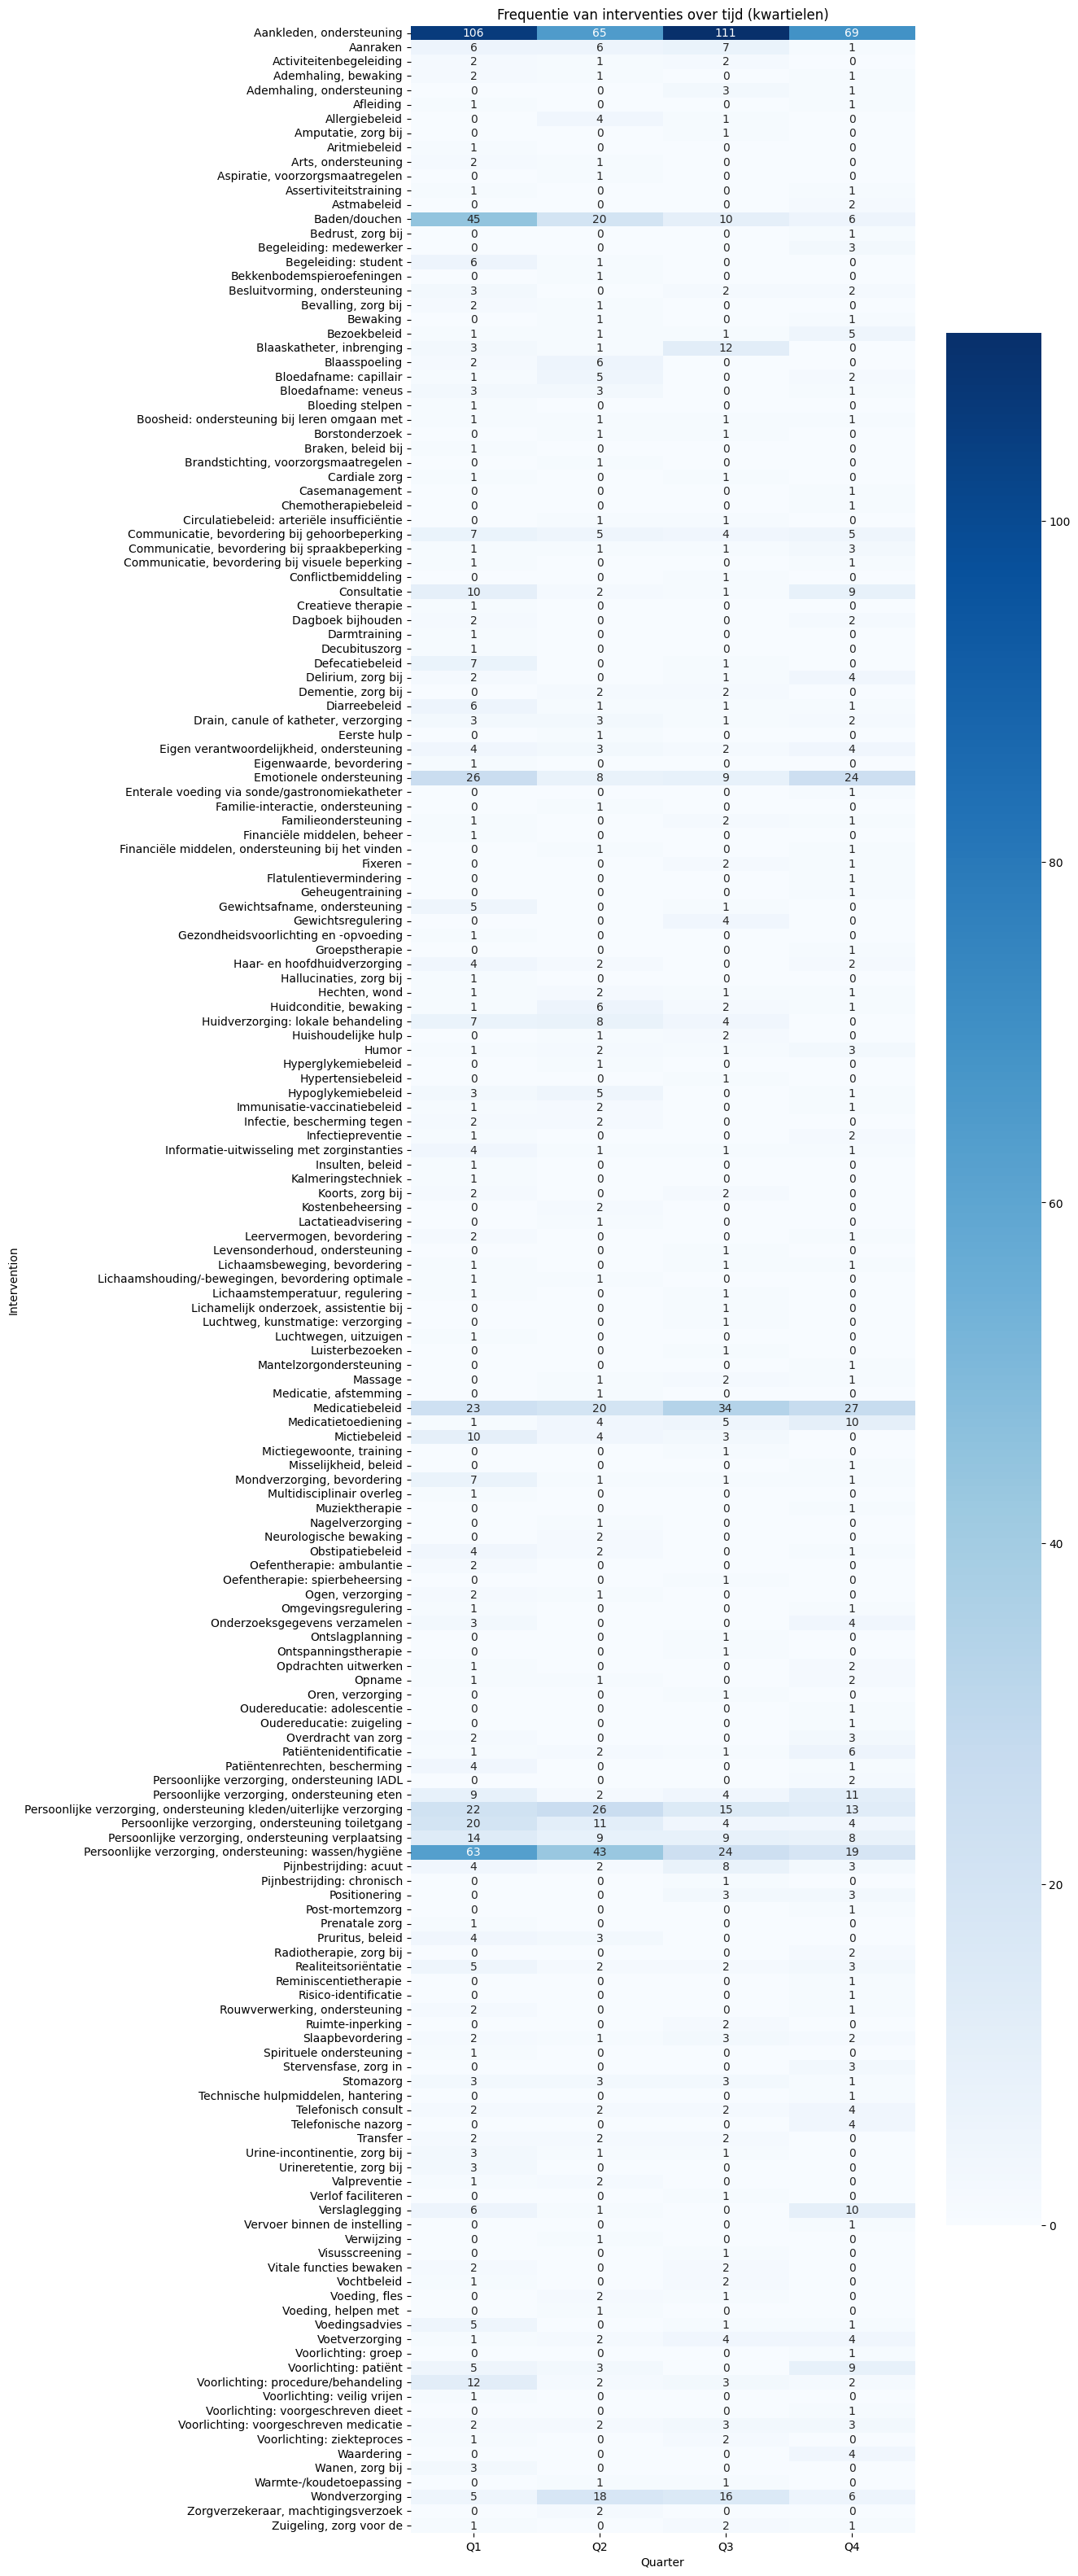

In [ ]:
# Aggregate the data
intervention_quarter_counts = df_event_log.groupby(['Intervention_final', 'Quarter']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 40))
sns.heatmap(intervention_quarter_counts, annot=True, cmap='Blues', fmt='d')
plt.title('Frequentie van interventies over tijd (kwartielen)')
plt.ylabel('Intervention')
plt.xlabel('Quarter')
plt.show()

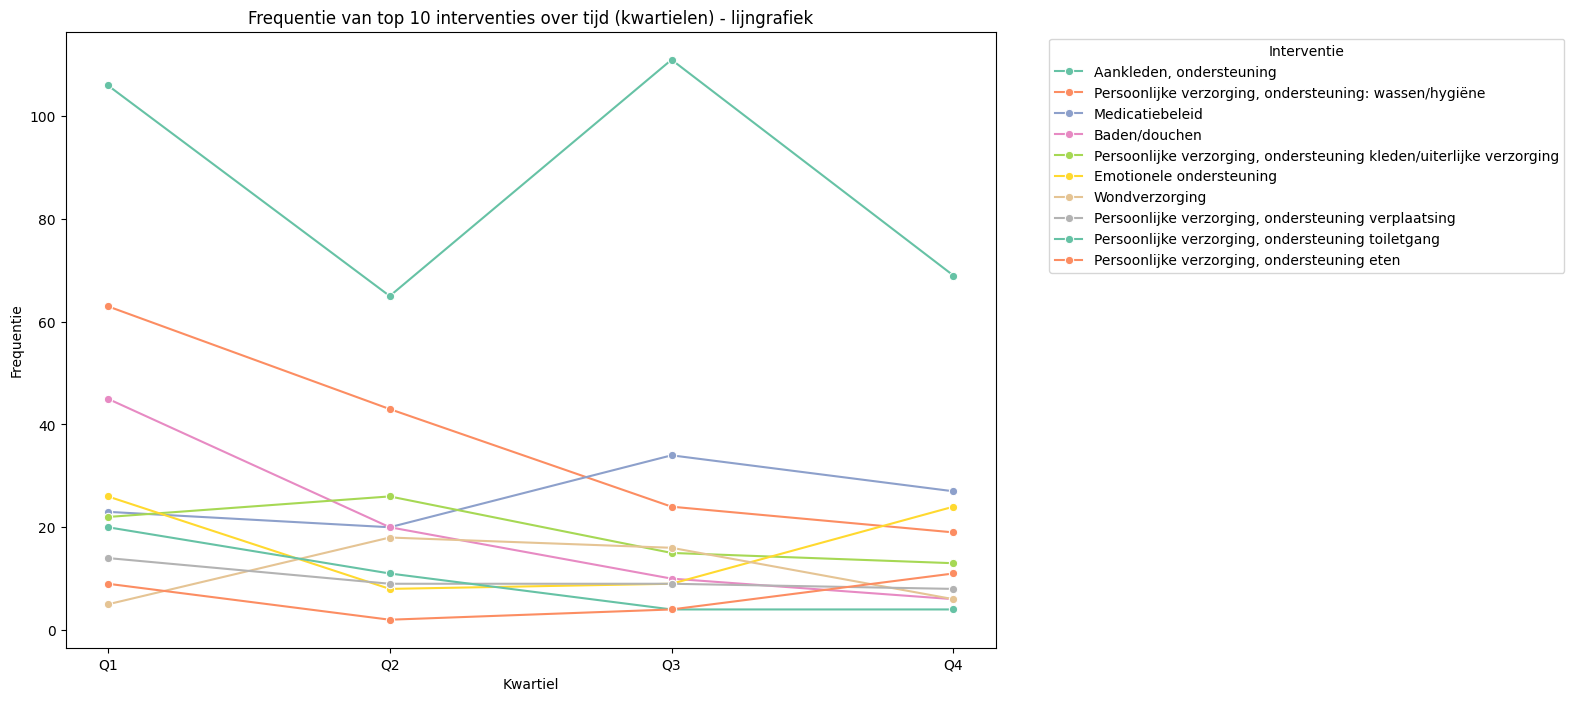

In [ ]:
# Aggregate the data by intervention and quarter
intervention_quarter_counts = df_event_log.groupby(['Intervention_final', 'Quarter']).size().unstack(fill_value=0)

# Calculate the total occurrences of each intervention
intervention_totals = intervention_quarter_counts.sum(axis=1)

# Get the top 10 interventions
top_10_interventions = intervention_totals.nlargest(10).index

# Filter the original data to keep only the top 10 interventions
filtered_intervention_quarter_counts = intervention_quarter_counts.loc[top_10_interventions]

# Reset index to prepare for plotting
filtered_intervention_quarter_counts = filtered_intervention_quarter_counts.reset_index()

# Melt the dataframe to long format
filtered_intervention_quarter_melted = filtered_intervention_quarter_counts.melt(id_vars='Intervention_final', var_name='Quarter', value_name='Count')

# Define the order of quarters
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']

# Convert the 'Quarter' column to a categorical type with a specified order
filtered_intervention_quarter_melted['Quarter'] = pd.Categorical(filtered_intervention_quarter_melted['Quarter'], categories=quarter_order, ordered=True)

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_intervention_quarter_melted, x='Quarter', y='Count', hue='Intervention_final', marker='o', palette='Set2')
plt.title('Frequentie van top 10 interventies over tijd (kwartielen) - lijngrafiek')
plt.ylabel('Frequentie')
plt.xlabel('Kwartiel')
plt.legend(title='Interventie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()